Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](img/descargar.png)

In [1]:
airbnb<-read.csv('data/airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
class(airbnb)

[1] "data.frame"

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
airbnb = airbnb [, c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(airbnb)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Barcelona,Entire home/apt,El Gòtic,2,1,0,1,349,NA,1,0,NA,41.38389,2.171802
2,Barcelona,Entire home/apt,El Raval,6,1,2,3,165,NA,4,20,93,41.38266,2.167558
3,Barcelona,Entire home/apt,Dreta de l'Eixample,5,1,2,2,129,NA,3,20,94,41.38847,2.168451
4,Barcelona,Entire home/apt,La Sagrada Família,5,1,2,2,90,NA,1,0,100,41.40259,2.176946
5,Barcelona,Entire home/apt,La Sagrada Família,6,1,2,3,89,NA,1,0,100,41.40501,2.173369
6,Barcelona,Entire home/apt,Sants-Montjuïc,5,2,3,3,68,NA,1,0,84,41.36726,2.147609


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
#df_new_econding$gender<-NULL
df_madrid = subset(airbnb, Room.Type=="Entire home/apt" & City == "Madrid" & Neighbourhood!="")
df_madrid$Room.Type = NULL
df_madrid$City = NULL

head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
18,Palacio,3,1,0,2,65,NA,2,10,96,40.41706,-3.709482
19,Palacio,5,2,2,3,100,NA,4,25,97,40.41934,-3.709556
20,Palacio,6,1,2,4,89,NA,2,10,94,40.42113,-3.708628
21,La Latina,4,1,1,2,49,0,2,20,89,40.41203,-3.709668
22,La Latina,4,1,1,1,89,NA,2,15,97,40.41205,-3.708516
25,La Latina,2,1,1,1,61,NA,1,0,95,40.41189,-3.712093


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [4]:
N_total = nrow(df_madrid)
N_SM_NA = sum(is.na(df_madrid$Square.Feet))

Percentage_SM_NA = (N_SM_NA / N_total)*100
paste('El porcentaje de los apartamentos que no muestran los metros cuadrados es:', round(Percentage_SM_NA, 2) , '%')

[1] "El porcentaje de los apartamentos que no muestran los metros cuadrados es: 93.8 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [5]:
N_SM_0 = length(which(df_madrid$Square.Feet == '0'))

Percentage_SM_0 = (N_SM_0 / (N_total-N_SM_NA))*100
paste('El porcentaje de los apartamentos que tienen 0 metros cuadrados es:', round(Percentage_SM_0, 2) , '%')

[1] "El porcentaje de los apartamentos que tienen 0 metros cuadrados es: 36.89 %"

Reemplazar todos los 0m^2 por NA 

In [6]:
df_madrid$Square.Feet[which(df_madrid$Square.Feet == '0')] = NA
#head(df_madrid)
paste('Número de regitros con metros cuadrados igual a NA:', sum(is.na(df_madrid$Square.Feet)))

[1] "Número de regitros con metros cuadrados igual a NA: 5382"

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

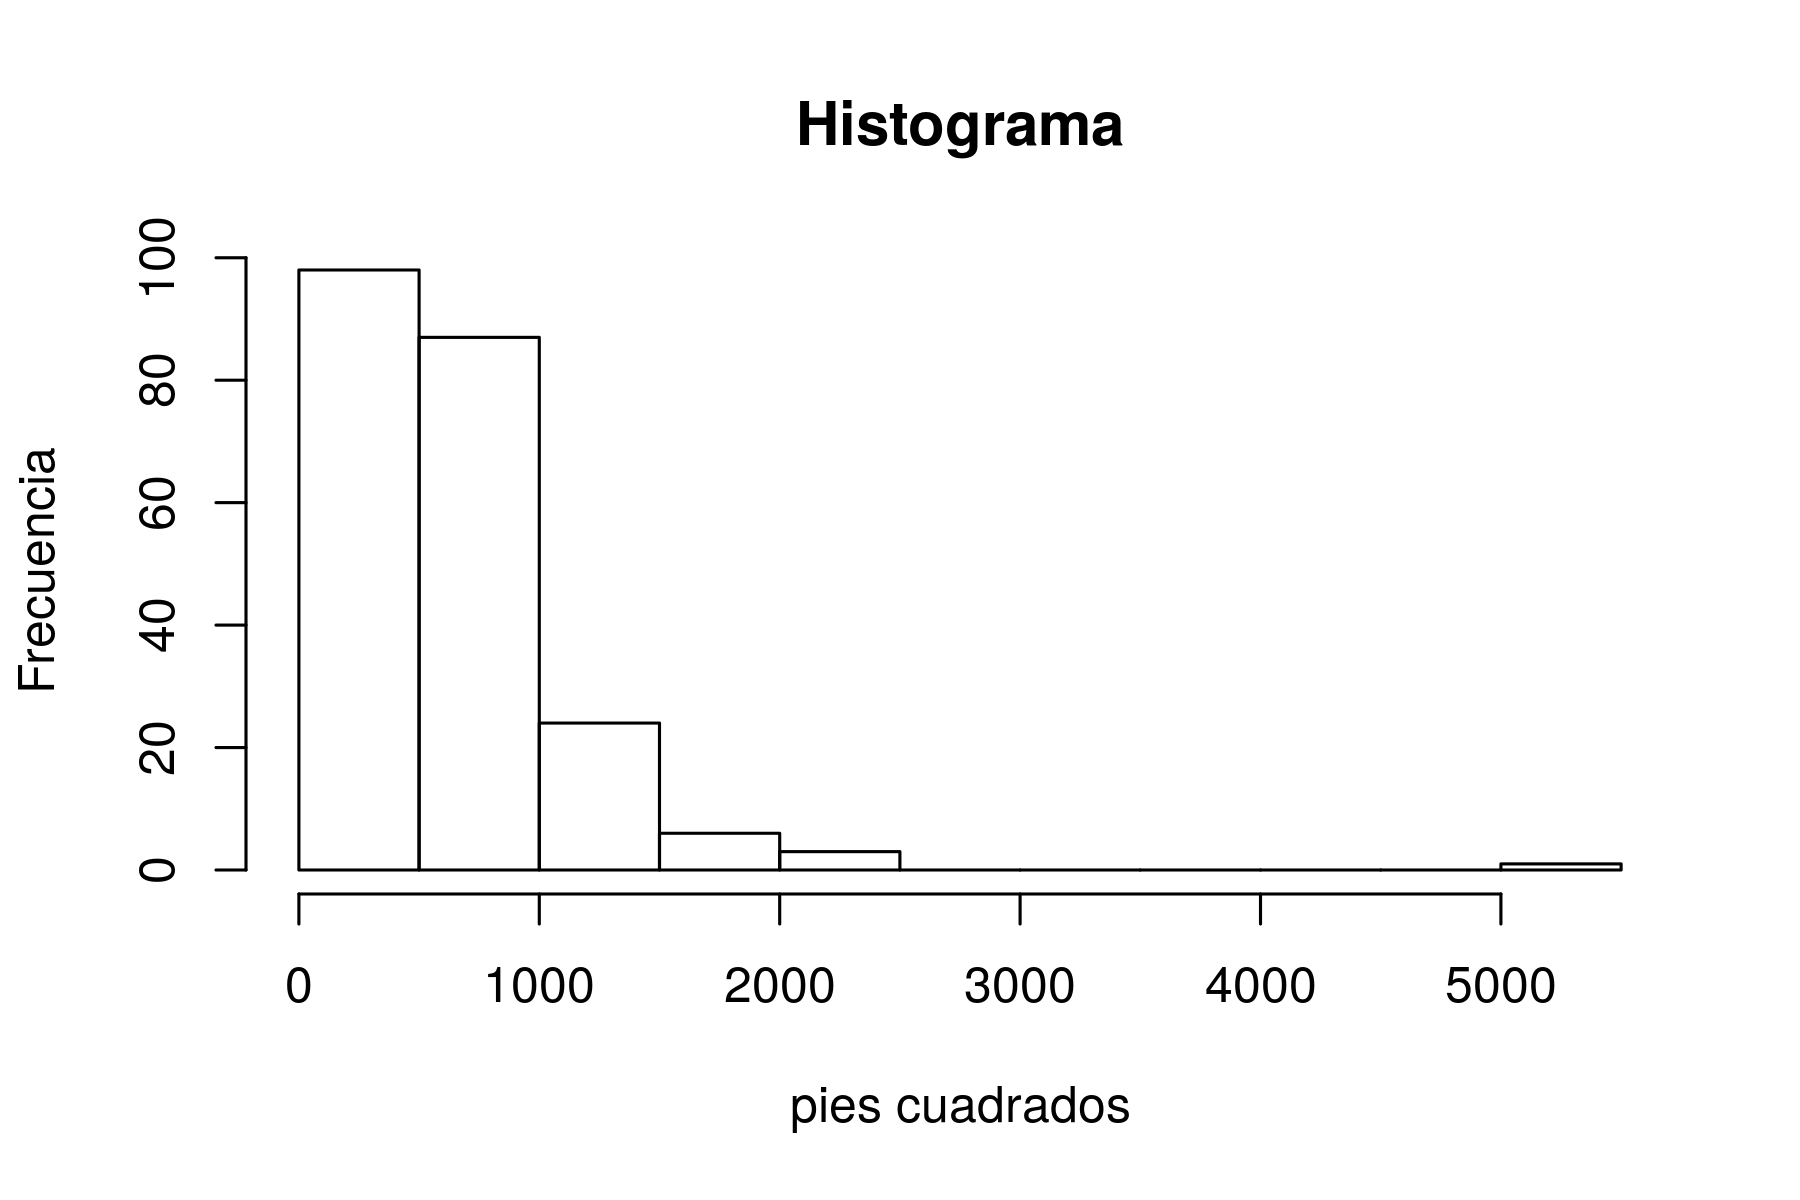

In [7]:
hist(df_madrid$Square.Feet, xlab="pies cuadrados", ylab="Frecuencia", main="Histograma")

In [8]:
conversionFeetMeters = 0.092903
df_madrid$Square.Meters = round (df_madrid$Square.Feet * conversionFeetMeters)
df_madrid$Square.Feet = NULL
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
18,Palacio,3,1,0,2,65,2,10,96,40.41706,-3.709482,NA
19,Palacio,5,2,2,3,100,4,25,97,40.41934,-3.709556,NA
20,Palacio,6,1,2,4,89,2,10,94,40.42113,-3.708628,NA
21,La Latina,4,1,1,2,49,2,20,89,40.41203,-3.709668,NA
22,La Latina,4,1,1,1,89,2,15,97,40.41205,-3.708516,NA
25,La Latina,2,1,1,1,61,1,0,95,40.41189,-3.712093,NA


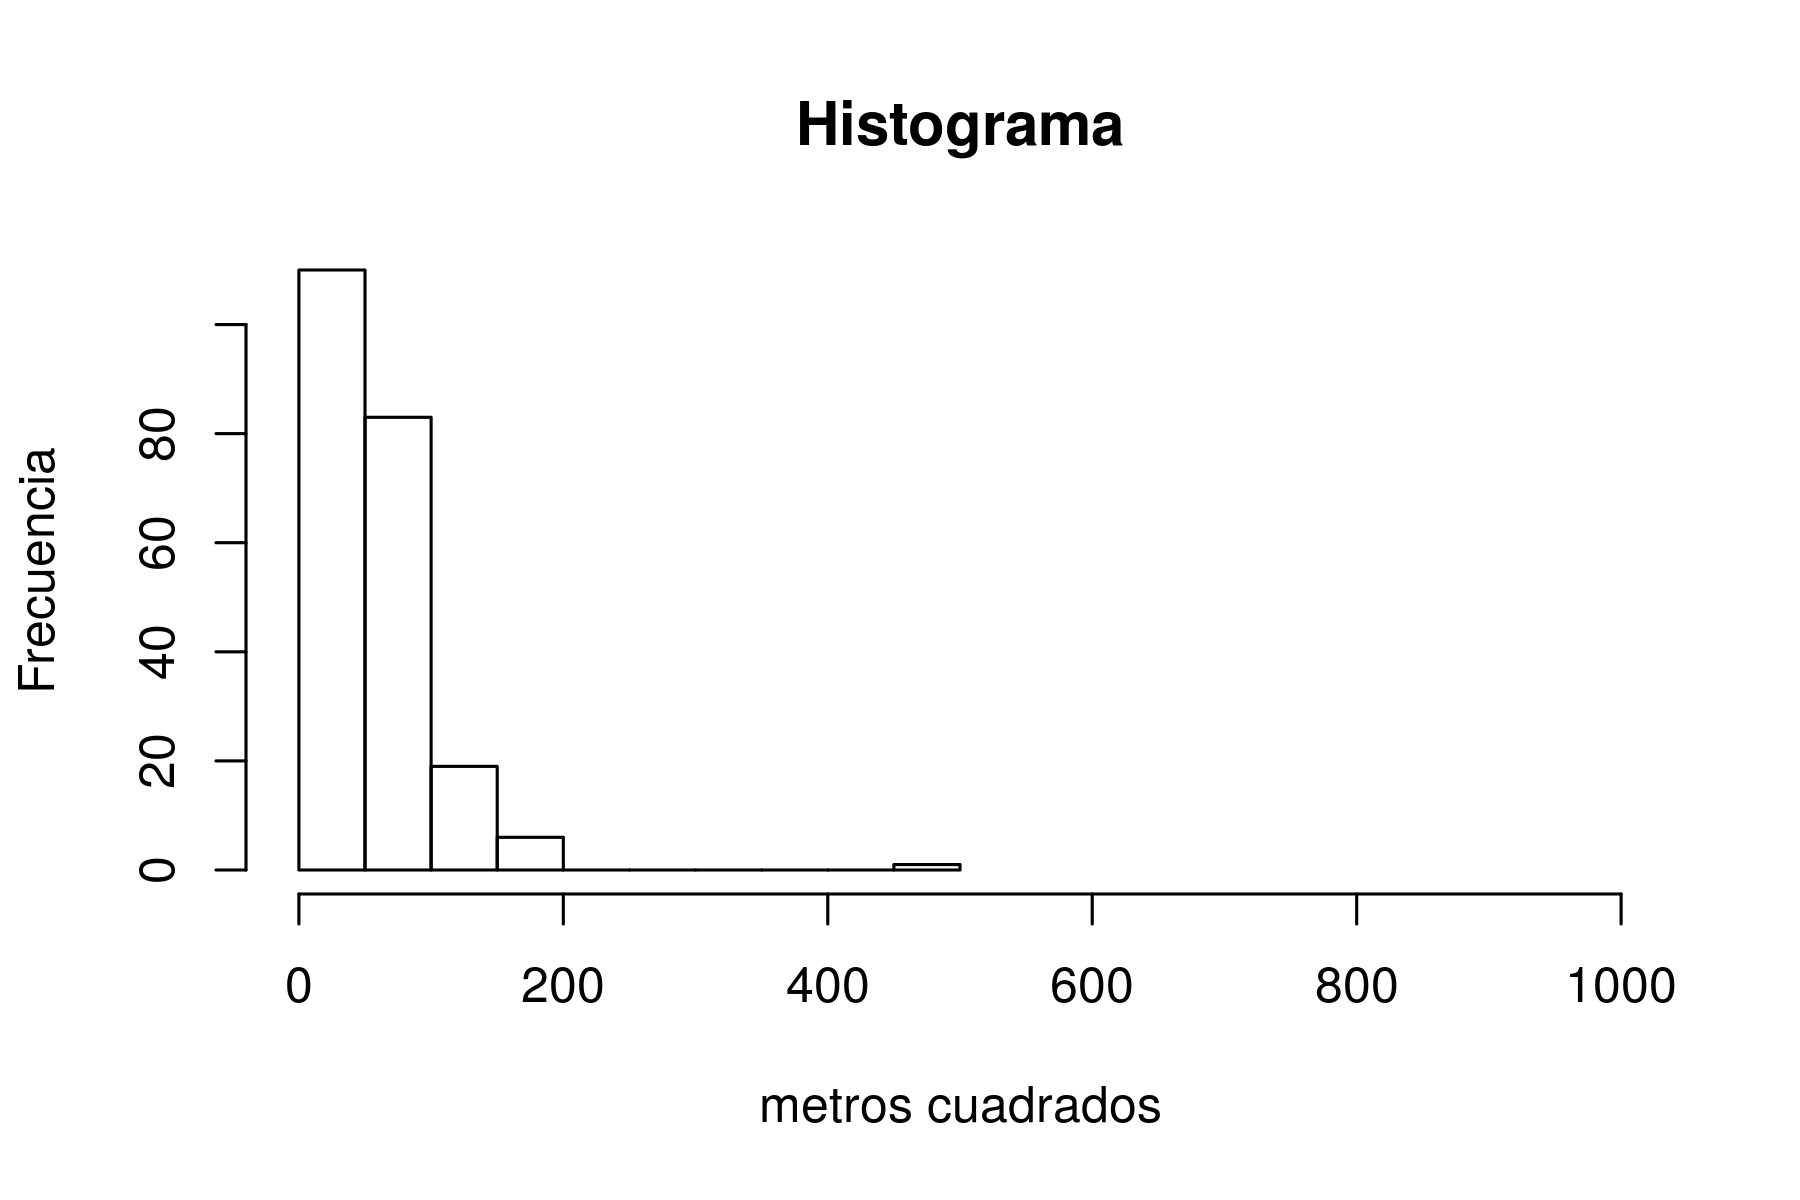

In [9]:
#df_madrid = subset (df_madrid, Square.Meters < 5000 )
#df_uniq <- unique(df_madrid$Neighbourhood)
#length(df_uniq)

hist(df_madrid$Square.Meters, xlab="metros cuadrados", ylab="Frecuencia", main="Histograma", xlim=c(0,1000))


Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

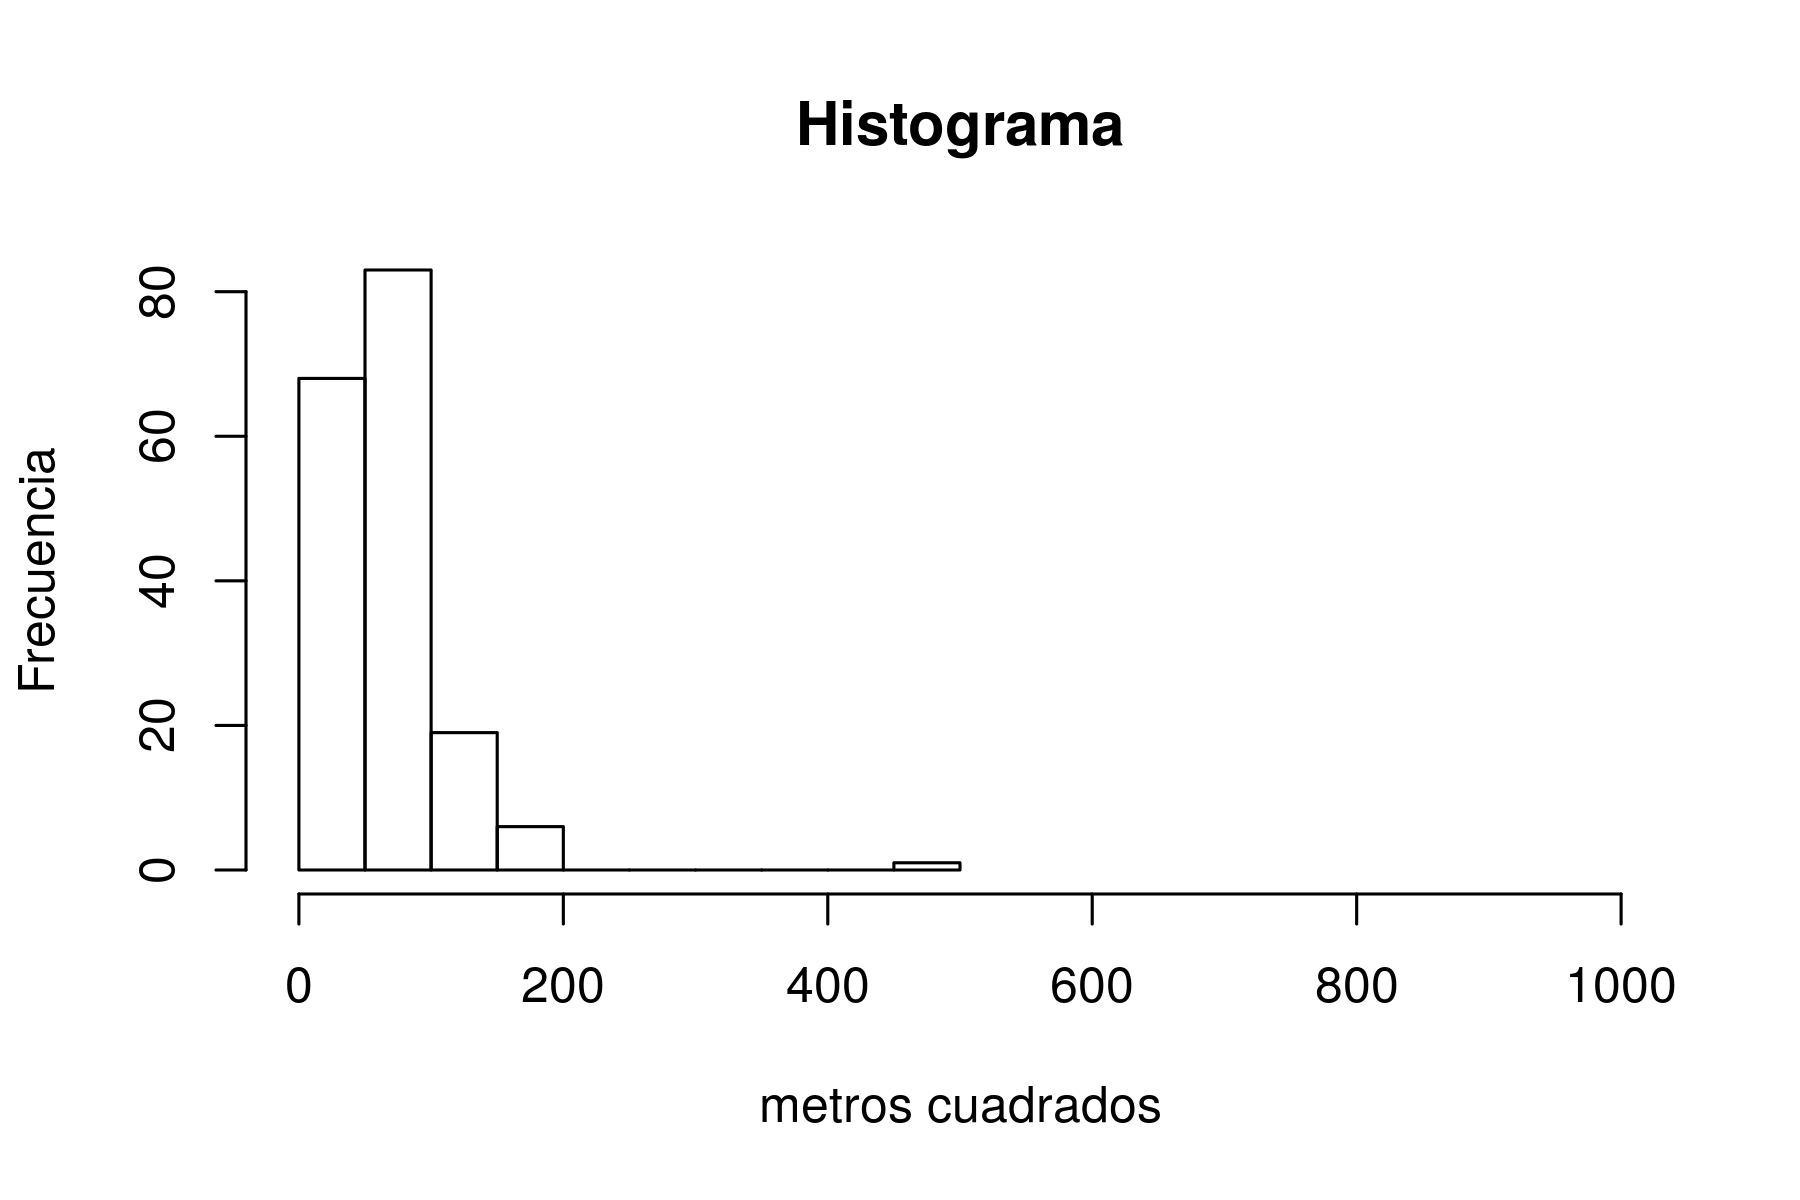

In [10]:
df_madrid$Square.Meters[which(df_madrid$Square.Meters < 20)] = NA
hist(df_madrid$Square.Meters, xlab="metros cuadrados", ylab="Frecuencia", main="Histograma", xlim=c(0,1000))


El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


[1] 65 65

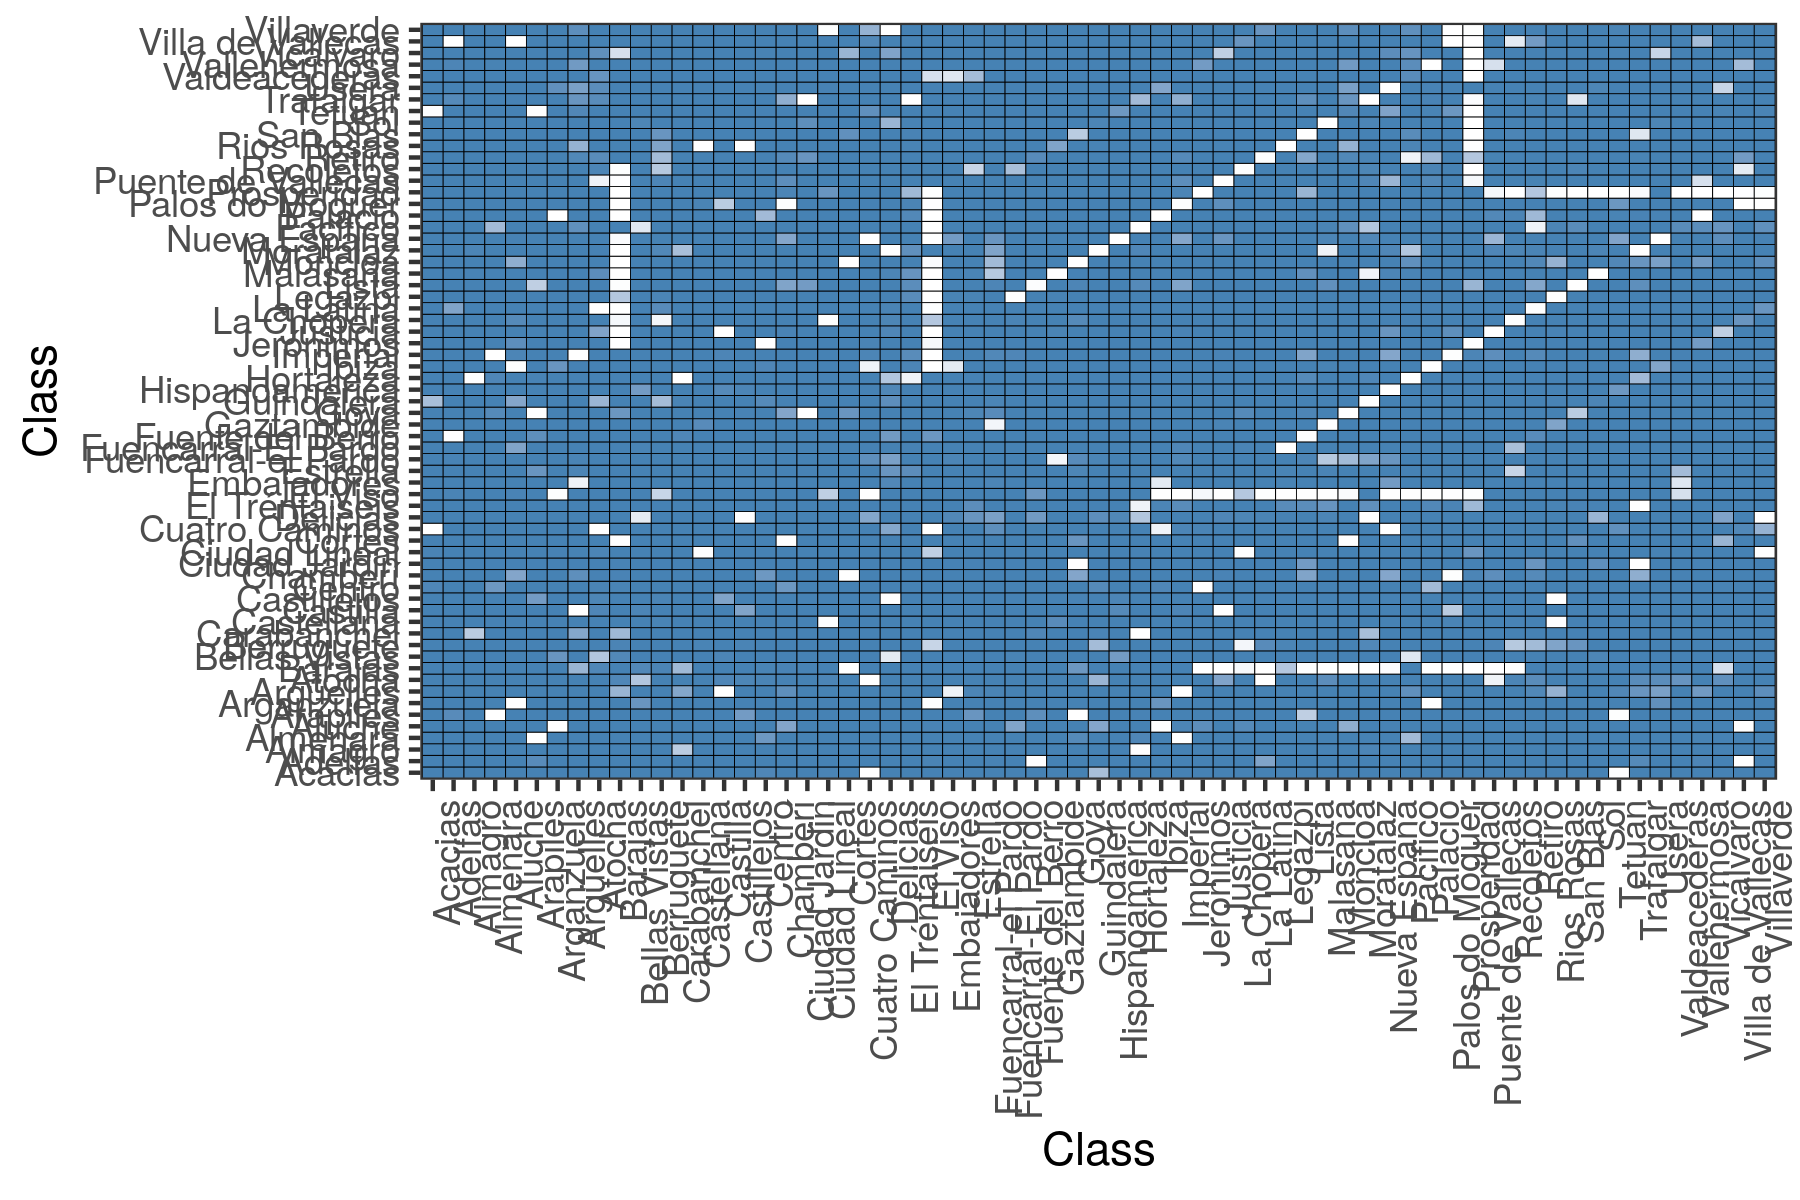

In [11]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
dim(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.



---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




[1] "Coeficiente de aglomeracion para método:  average , es:  0.545203678861295"
[1] "Coeficiente de aglomeracion para método:  single , es:  0.505722553681489"
[1] "Coeficiente de aglomeracion para método:  complete , es:  0.639218508016312"
[1] "Coeficiente de aglomeracion para método:  ward , es:  0.713824464542395"


[1] "Viendo los coeficientes de aglomeracion el método que parece crear clusters mas diferenciados es Ward"

[1] "Numeros de cluster que se muestras a un corte de h = 0.9, es : 8"

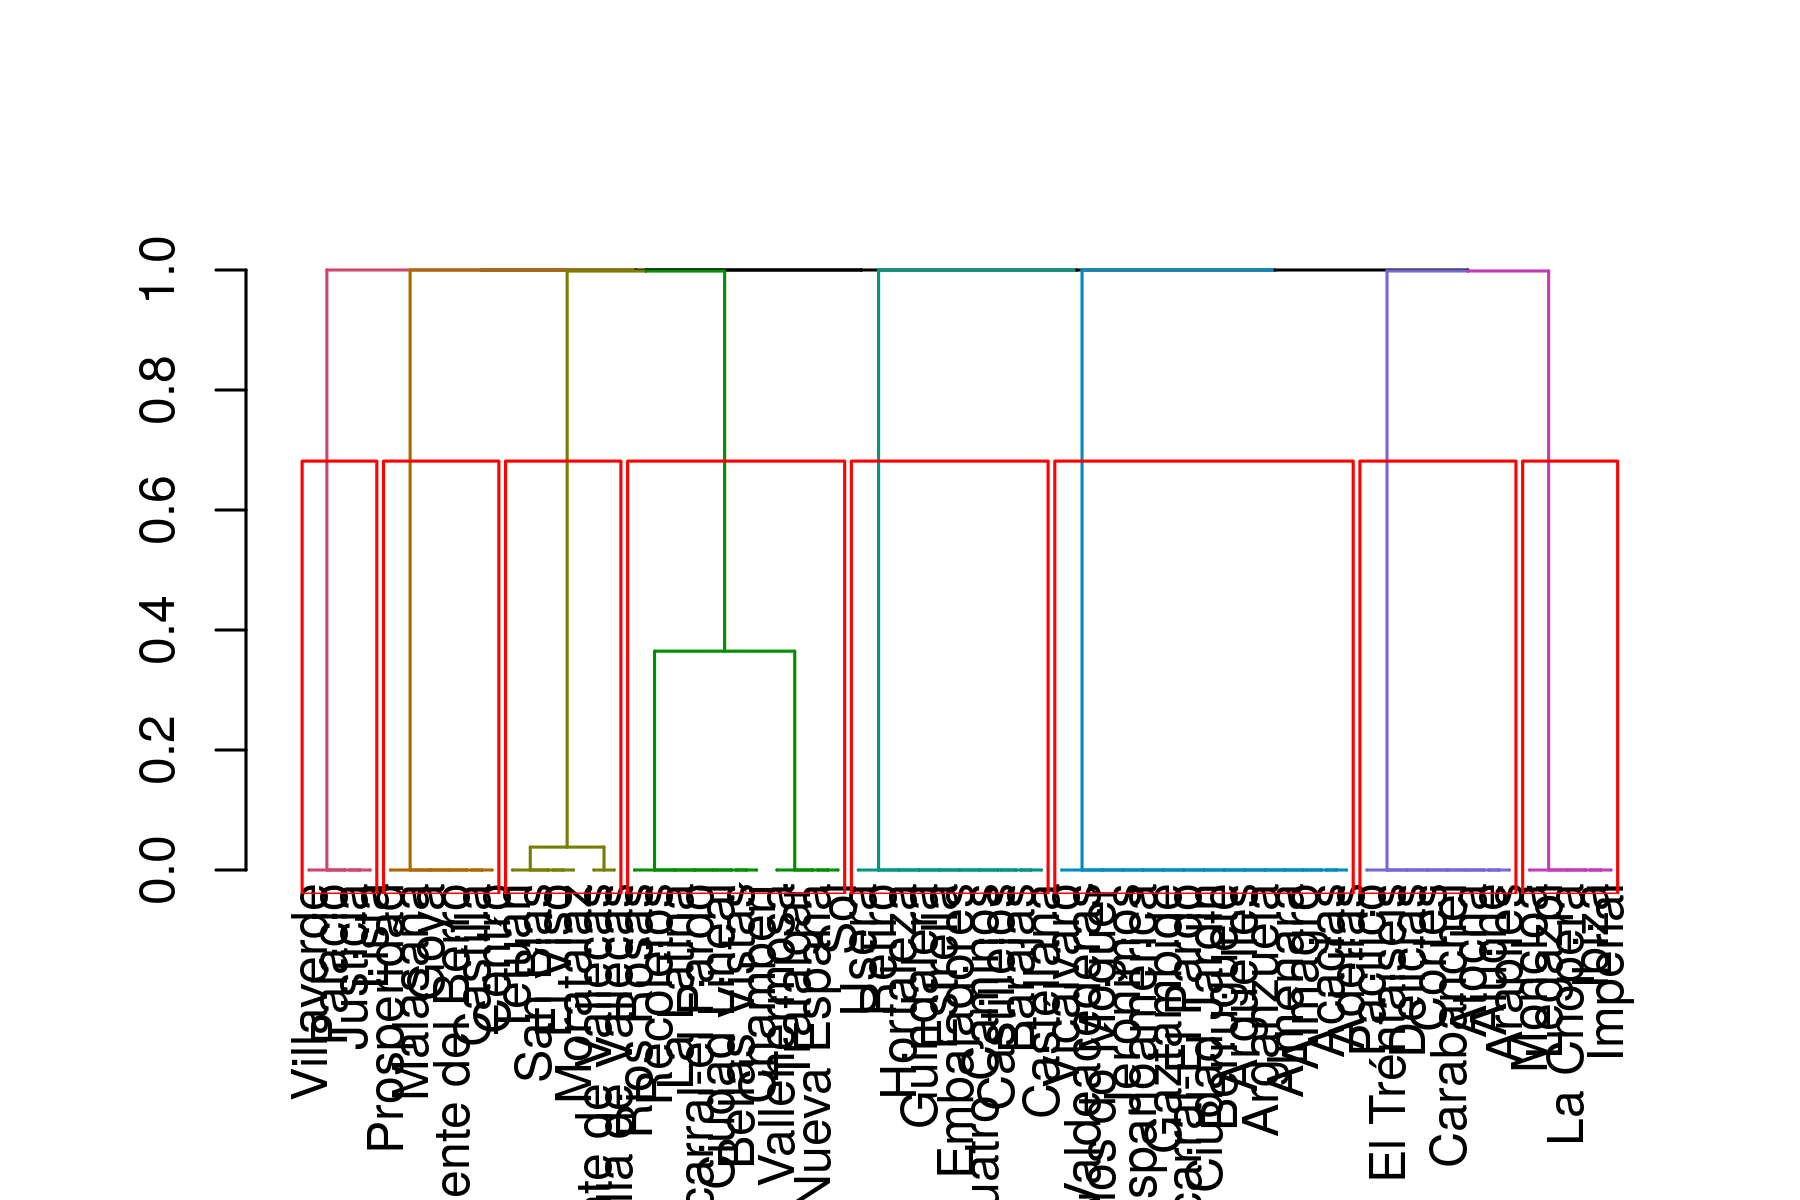

In [12]:
library(dendextend)
library(cluster)

# La distancia ya nos la da la matriz resm
d = 1 - resm
# reconvierto la matriz a una matriz distancia que el hclust puede interpretar
d1 = as.dist(d)
hc = hclust(d1, method="complete")
hcd = as.dendrogram(hc) 
plot(color_branches(hcd,h=0.9))

# dibujar rectangulos para cada cluster
ncluster = rect.hclust(hc, h=0.9)
#ncluster


# El coeficiente sacado del analisis Agnes, ayuda a identificar metodos de hierarchical cluster
# que puedean tener una estructura solida de agrupacion, cuanto mas alto sea este valor
m <- c( "average", "single", "complete", "ward")
for(i in 1:length(m)){
    coefficient = agnes(resm, method = m[i])$a
    print (paste("Coeficiente de aglomeracion para método: ", m[i] , ", es: ", coefficient))
}

paste("Viendo los coeficientes de aglomeracion el método que parece crear clusters mas diferenciados es Ward")
paste("Numeros de cluster que se muestras a un corte de h = 0.9, es :", length(ncluster))

In [13]:
cls = cutree(hcd,h=0.9)
ncls = max(cls)

Silhouette of 65 units in 8 clusters from silhouette.default(x = cls, dist = d1) :
 Cluster sizes and average silhouette widths:
         15           8          10          11           6           6 
 0.40000000  0.75000000  0.40000000 -0.05778236  0.66666667  0.02223673 
          5           4 
 0.60000000  1.00000000 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.0000  0.0000  0.9474  0.4077  1.0000  1.0000 

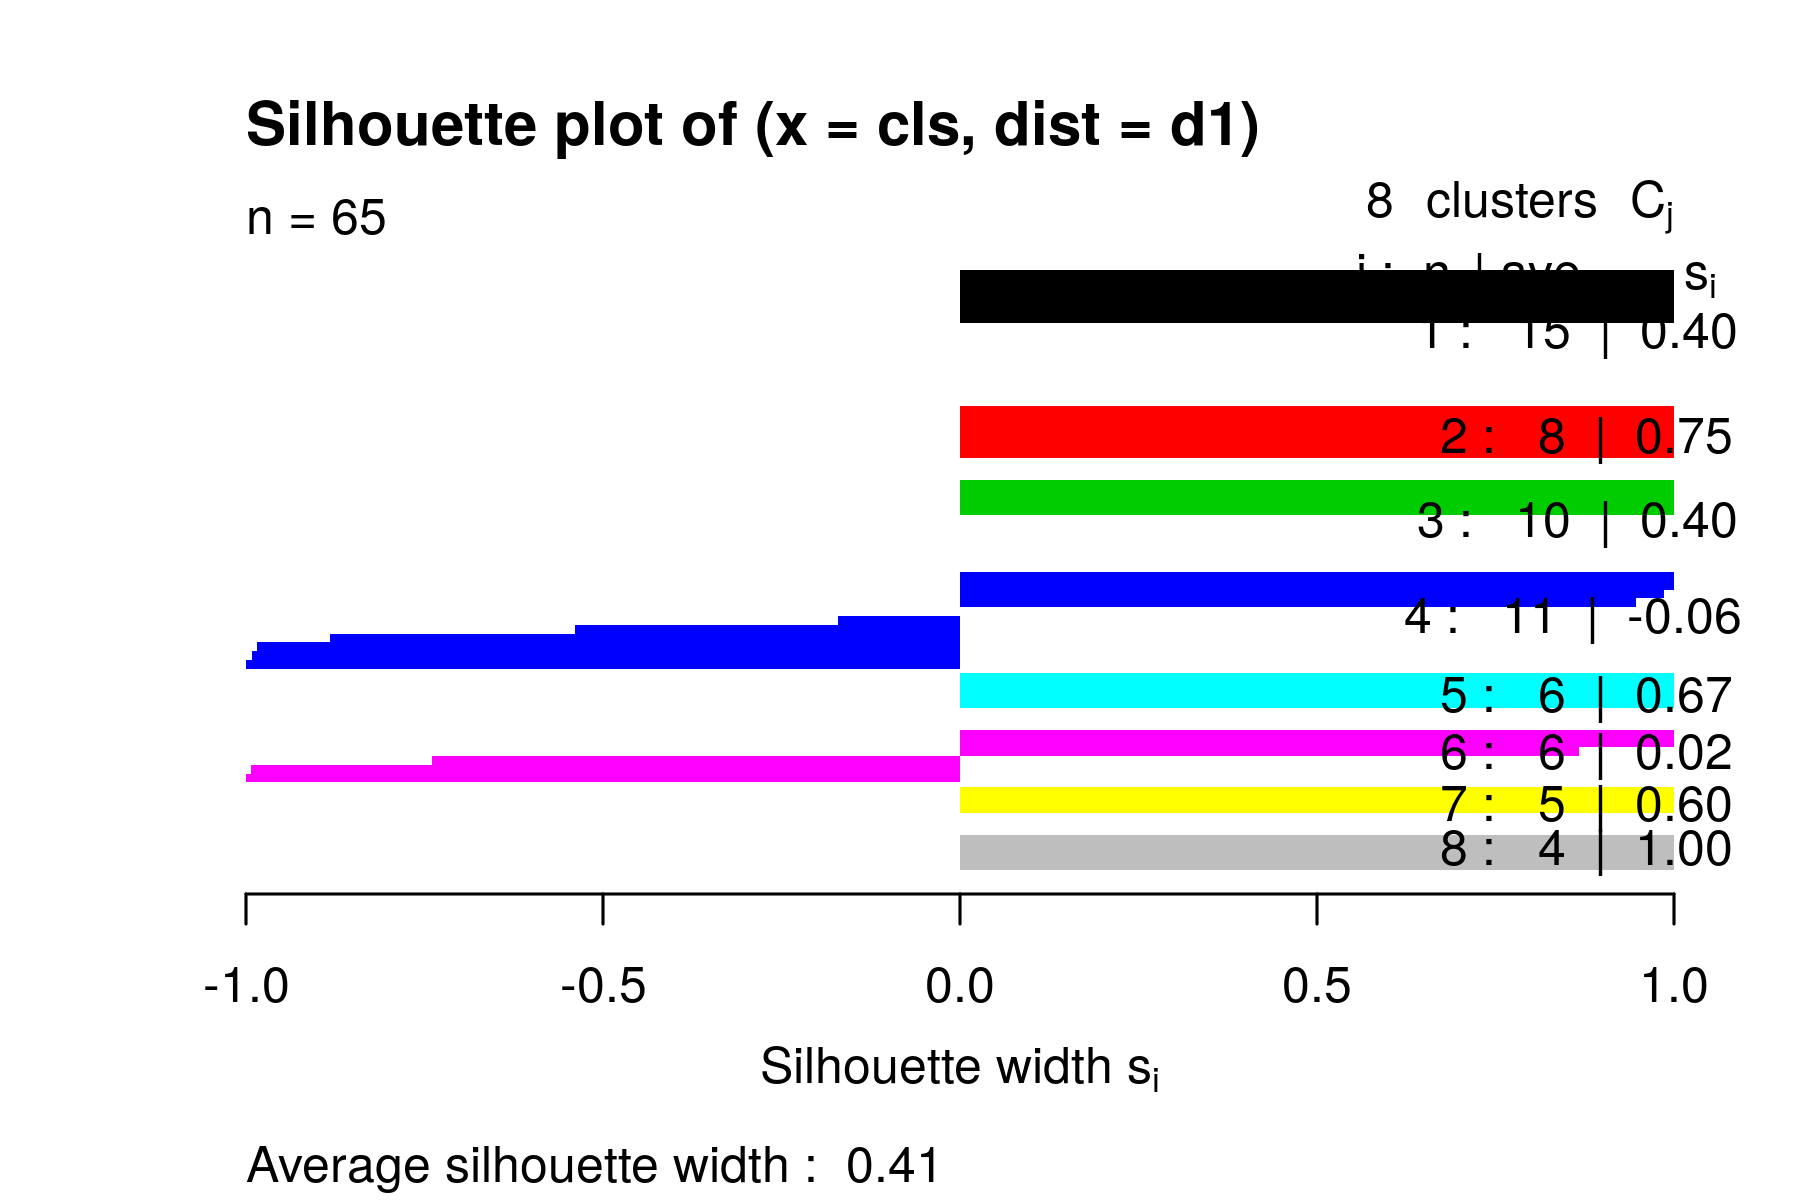

In [14]:
ss<-silhouette(cls, d1)  
summary(ss)
plot(ss,col=1:ncls,border=NA)

#La herramienta Silhoutte es una medida para valorar cuanto de cercano cada elemento en un cluster esta 
# a elementos del cluster vecino.
#Valores "0" indican que ese elemento está muy cerca de la barrera de decisión entre dos cluster vecinos
#Valores negativos indican que esos elementos se han podido asignar de forma equivocada a otro cluster


Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

In [15]:
# De todas las pruebas, analizando los coeficientes de aglomeración, el metodo ward da mejores resultados, pero su silhoutte
# muestra muchos elementos negativos. El segundo metodo con coeficiente de aglomeración mas alto es complete. 
# Este método da mejores resultados con silhoutte, y por eso y porque en slack mis compañeros también tienen mejores resultados
# con 7-9 cluster ( :p jaja te has reido verdad?)  he escogido este método. 
# Ademas que haya batante distancia entre los clusters, significa que se pueden diferenciar bien.
paste("Numeros de cluster que se muestran a un corte de h = 0.9, es :", ncls)

[1] "Numeros de cluster que se muestran a un corte de h = 0.9, es : 8"

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [16]:
df_aux = data.frame('Neighbourhood'=names(cls),'neighb_id'=as.factor(cls))
df_madrid2= merge(df_madrid, df_aux, by='Neighbourhood')
df_madrid3 = df_madrid2[,2:ncol(df_madrid2)]
head(df_madrid3)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,2,1,1,1,65,1,0,100,40.40233,-3.705738,NA,1
2,4,1,2,2,45,2,25,89,40.40068,-3.704121,NA,1
3,4,1,1,2,59,2,10,95,40.39933,-3.701477,NA,1
4,4,1,2,3,60,1,0,92,40.40604,-3.710295,NA,1
5,3,1,1,2,45,2,10,100,40.40404,-3.703835,NA,1
6,2,2,1,1,68,1,0,NA,40.40176,-3.700929,NA,1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [17]:
set.seed(20)
idx = sample(1:nrow(df_madrid2),nrow(df_madrid2)*0.7)
df_madrid2.train = df_madrid2[idx,]
df_madrid2.test = df_madrid2[-idx,]
# Quitar columna Neighbourhood del data frame para contar solo el valor de la variable negihb_id
df_madrid3.train = df_madrid3[idx,]
df_madrid3.test = df_madrid3[-idx,]
#head(df_madrid3.train)

# Modelos
mod1 = lm (Square.Meters~.,data=df_madrid3.train)
mod2 = lm (Square.Meters~ Bedrooms ,data=df_madrid2.train)
mod3 = lm (Square.Meters~ Price ,data=df_madrid3.train)
mod4 = lm (Square.Meters~ Price + Bedrooms + Bathrooms, data=df_madrid3.train)
summary(mod1)
summary(mod2)
summary(mod3)
summary(mod4)


Call:
lm(formula = Square.Meters ~ ., data = df_madrid3.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.957 -12.513  -0.684  10.358  74.322 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -3.872e+03  8.424e+03  -0.460 0.646953    
Accommodates          2.527e+00  2.465e+00   1.025 0.308078    
Bathrooms             1.282e+01  6.208e+00   2.065 0.041894 *  
Bedrooms              1.553e+01  4.074e+00   3.811 0.000256 ***
Beds                 -1.560e+00  2.663e+00  -0.586 0.559545    
Price                 1.305e-01  4.742e-02   2.751 0.007215 ** 
Guests.Included      -6.031e-01  2.227e+00  -0.271 0.787148    
Extra.People          3.759e-01  2.561e-01   1.468 0.145699    
Review.Scores.Rating  3.162e-01  2.866e-01   1.103 0.272999    
Latitude              9.161e+01  1.971e+02   0.465 0.643173    
Longitude            -4.195e+01  2.347e+02  -0.179 0.858560    
neighb_id2           -5.331e+00  1.079e+01  -0.494 0.622580


Call:
lm(formula = Square.Meters ~ Bedrooms, data = df_madrid2.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.986 -12.986  -2.986   7.456  96.571 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   27.101      4.078   6.645 1.24e-09 ***
Bedrooms      25.442      2.148  11.842  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23 on 109 degrees of freedom
  (3809 observations deleted due to missingness)
Multiple R-squared:  0.5627,	Adjusted R-squared:  0.5586 
F-statistic: 140.2 on 1 and 109 DF,  p-value: < 2.2e-16



Call:
lm(formula = Square.Meters ~ Price, data = df_madrid3.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-110.949  -15.646   -4.533    7.925   92.931 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.08437    4.41231   7.951 1.76e-12 ***
Price        0.36173    0.04047   8.938 1.05e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.49 on 110 degrees of freedom
  (3808 observations deleted due to missingness)
Multiple R-squared:  0.4207,	Adjusted R-squared:  0.4154 
F-statistic: 79.88 on 1 and 110 DF,  p-value: 1.054e-14



Call:
lm(formula = Square.Meters ~ Price + Bedrooms + Bathrooms, data = df_madrid3.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.632 -11.373  -1.845   8.543  85.281 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.91884    5.13735   2.515  0.01343 *  
Price        0.13551    0.04222   3.209  0.00177 ** 
Bedrooms    15.91580    2.80231   5.680 1.21e-07 ***
Bathrooms   13.54320    5.15979   2.625  0.00996 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.02 on 105 degrees of freedom
  (3811 observations deleted due to missingness)
Multiple R-squared:  0.6479,	Adjusted R-squared:  0.6379 
F-statistic: 64.41 on 3 and 105 DF,  p-value: < 2.2e-16


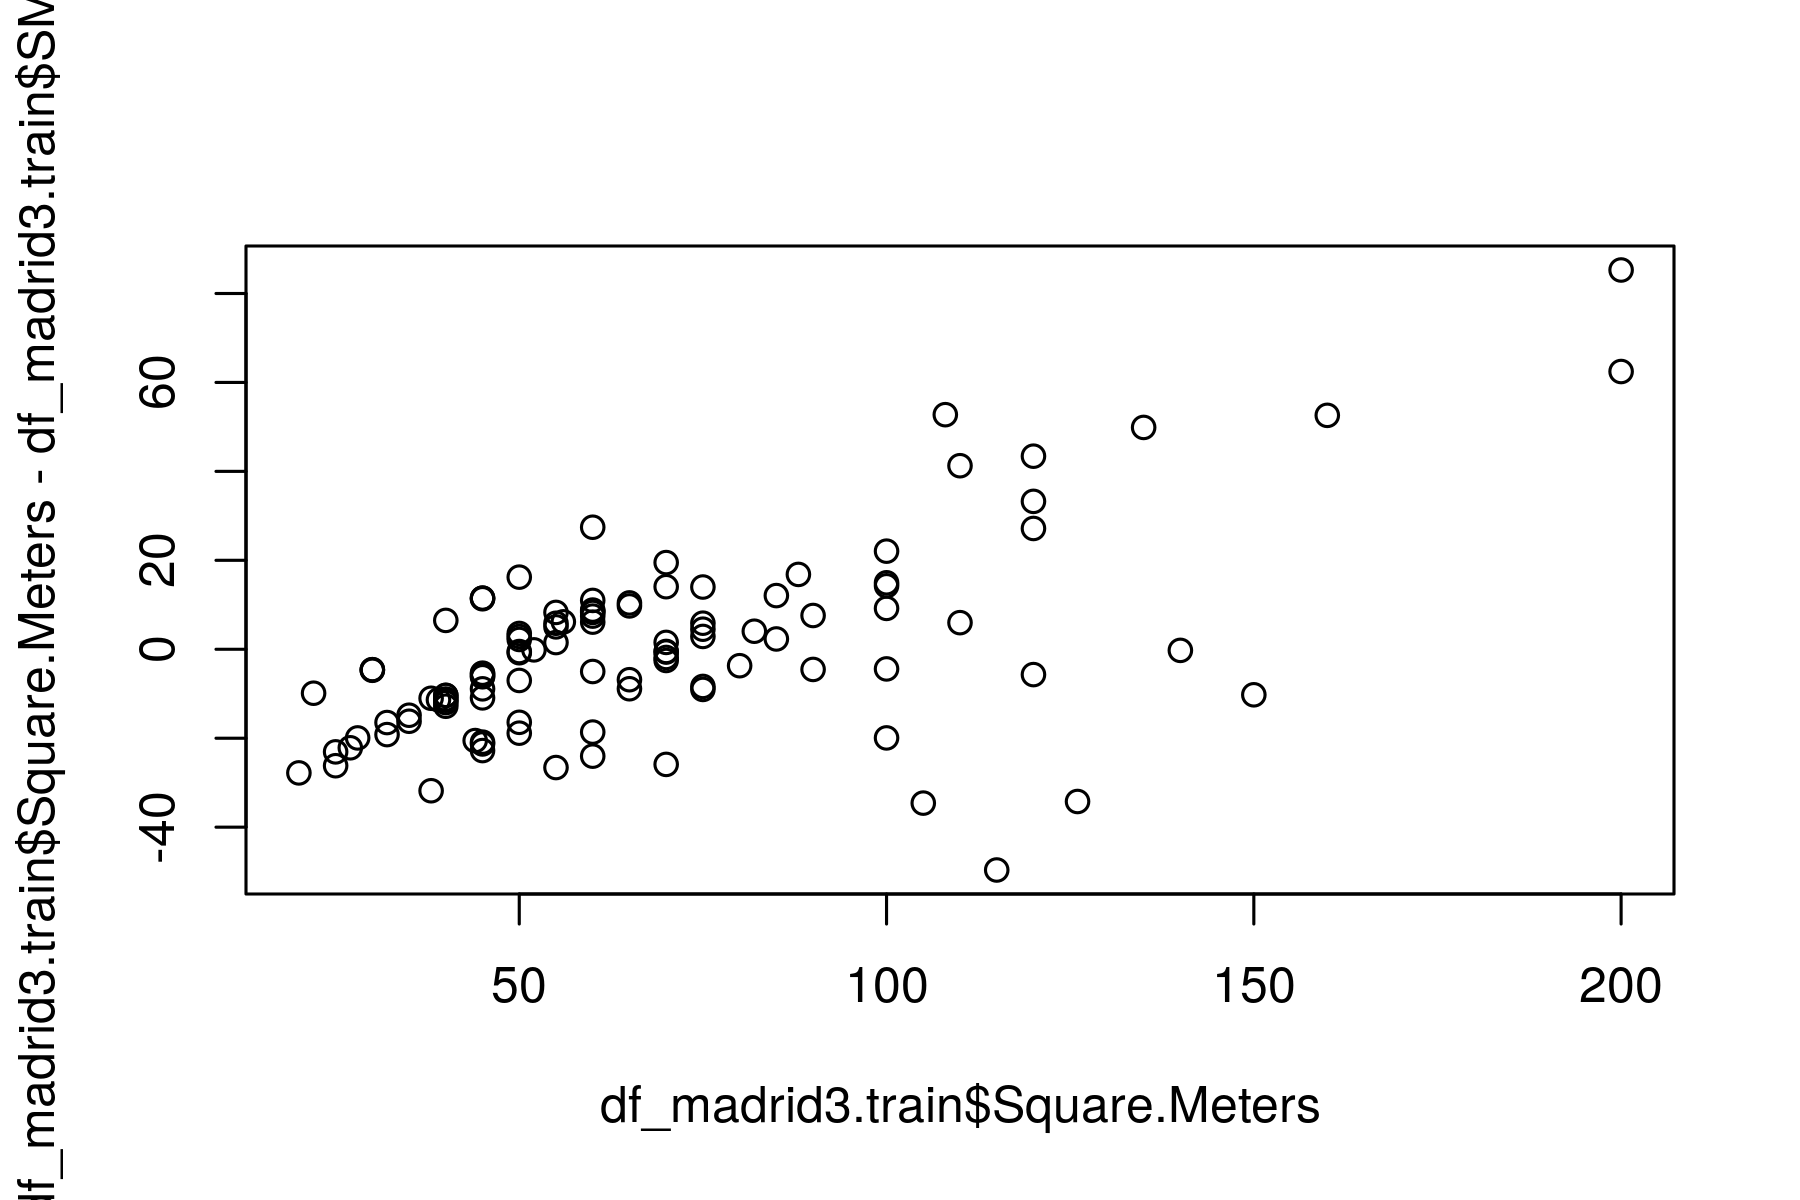

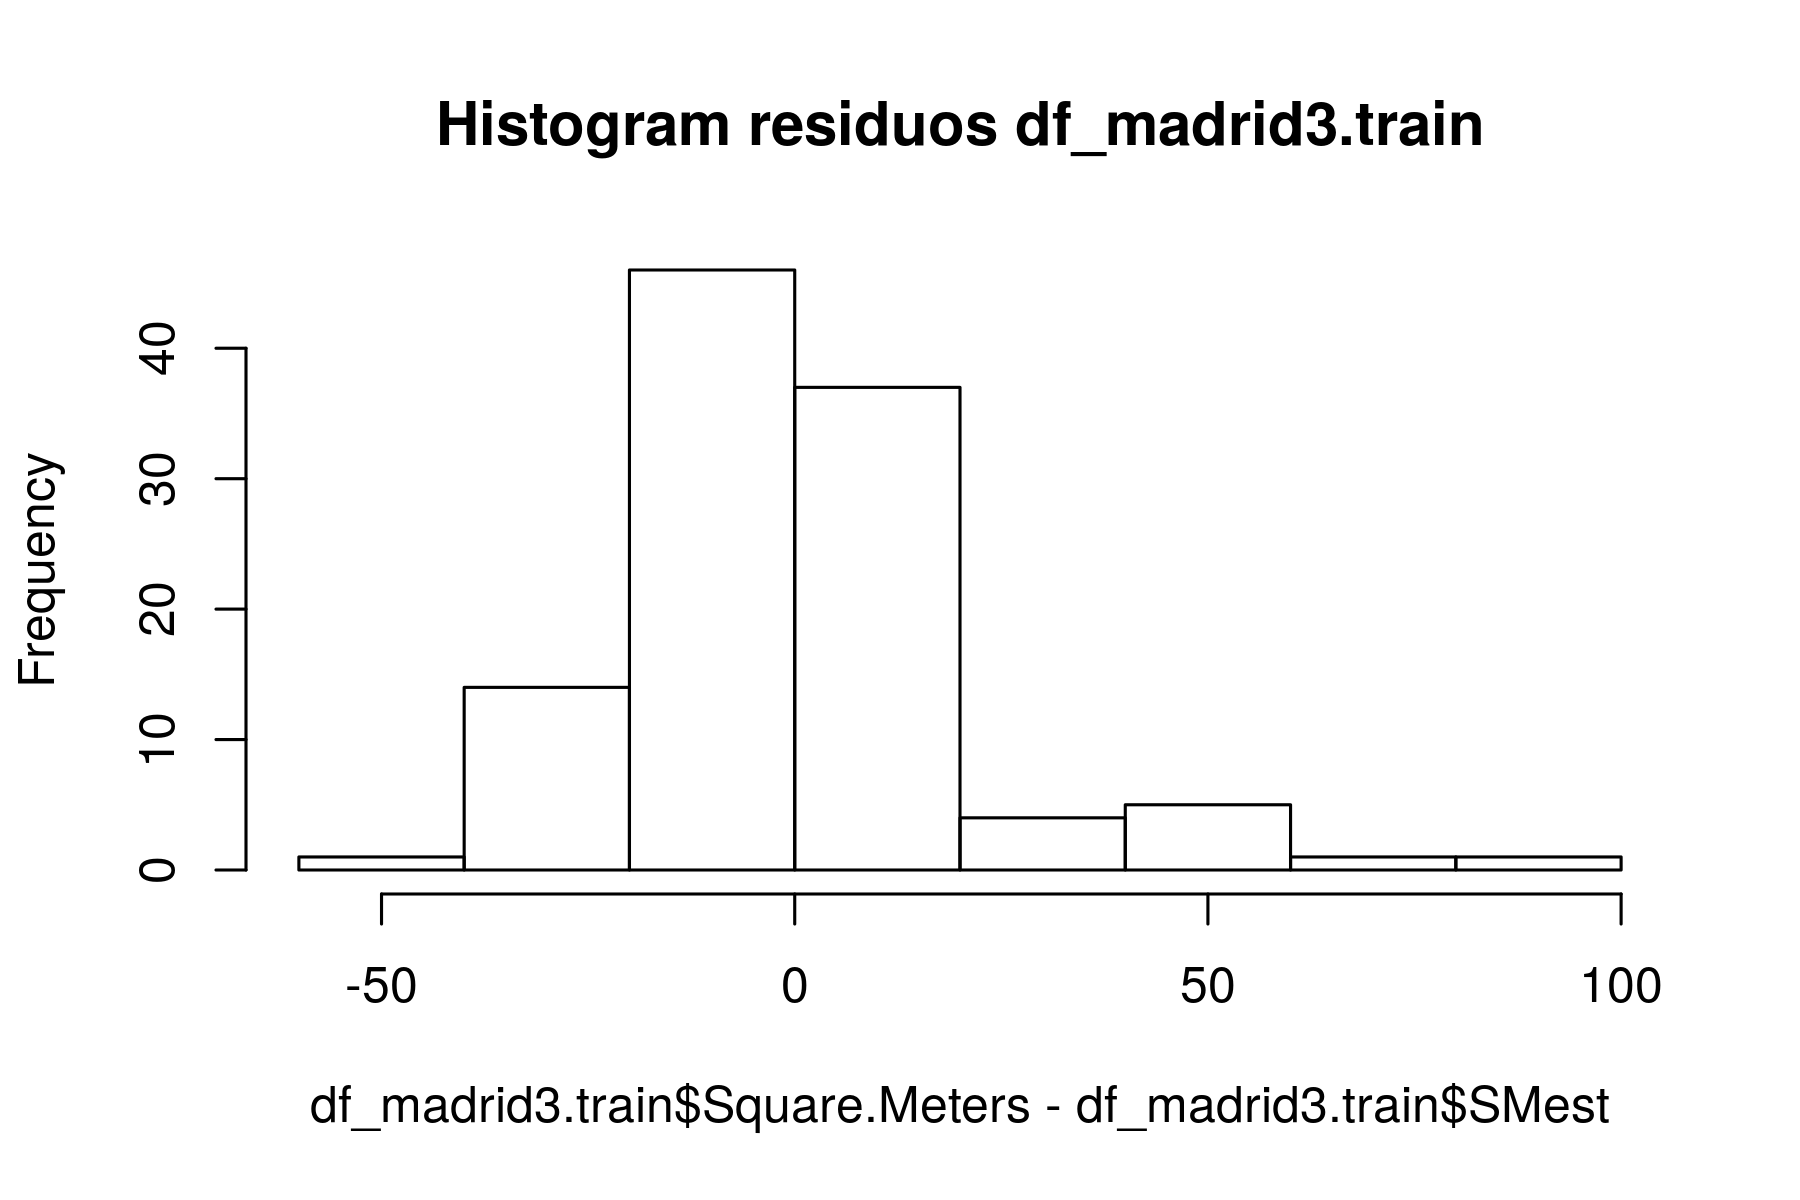

In [18]:
# Me quedo con el modelo mod4 que es el que da un valor R-squared mas alto.
df_madrid3.train$SMest = predict (mod4, df_madrid3.train)
df_madrid3.test$SMest = predict (mod4, df_madrid3.test)

plot(df_madrid3.train$Square.Meters ,(df_madrid3.train$Square.Meters-df_madrid3.train$SMest))
hist(df_madrid3.train$Square.Meters-df_madrid3.train$SMest, main="Histogram residuos df_madrid3.train")

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

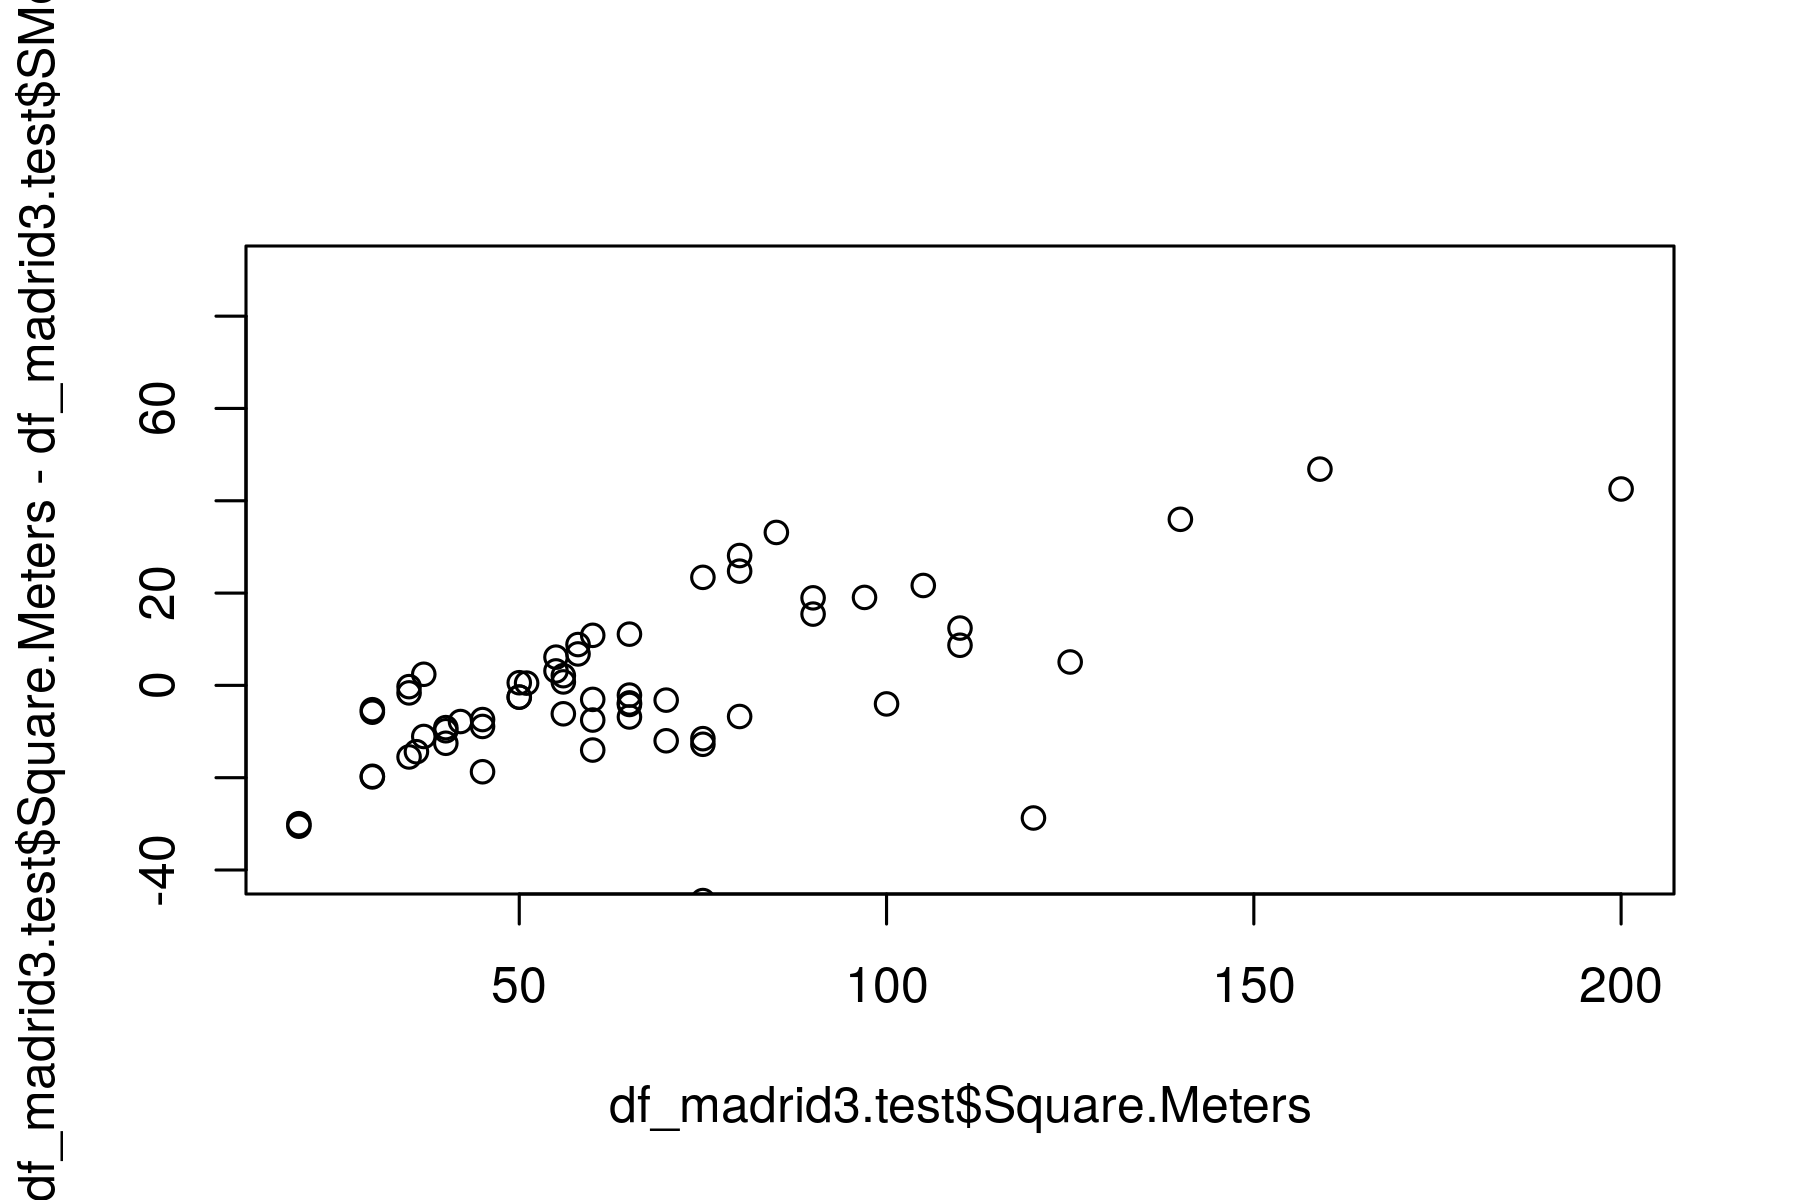

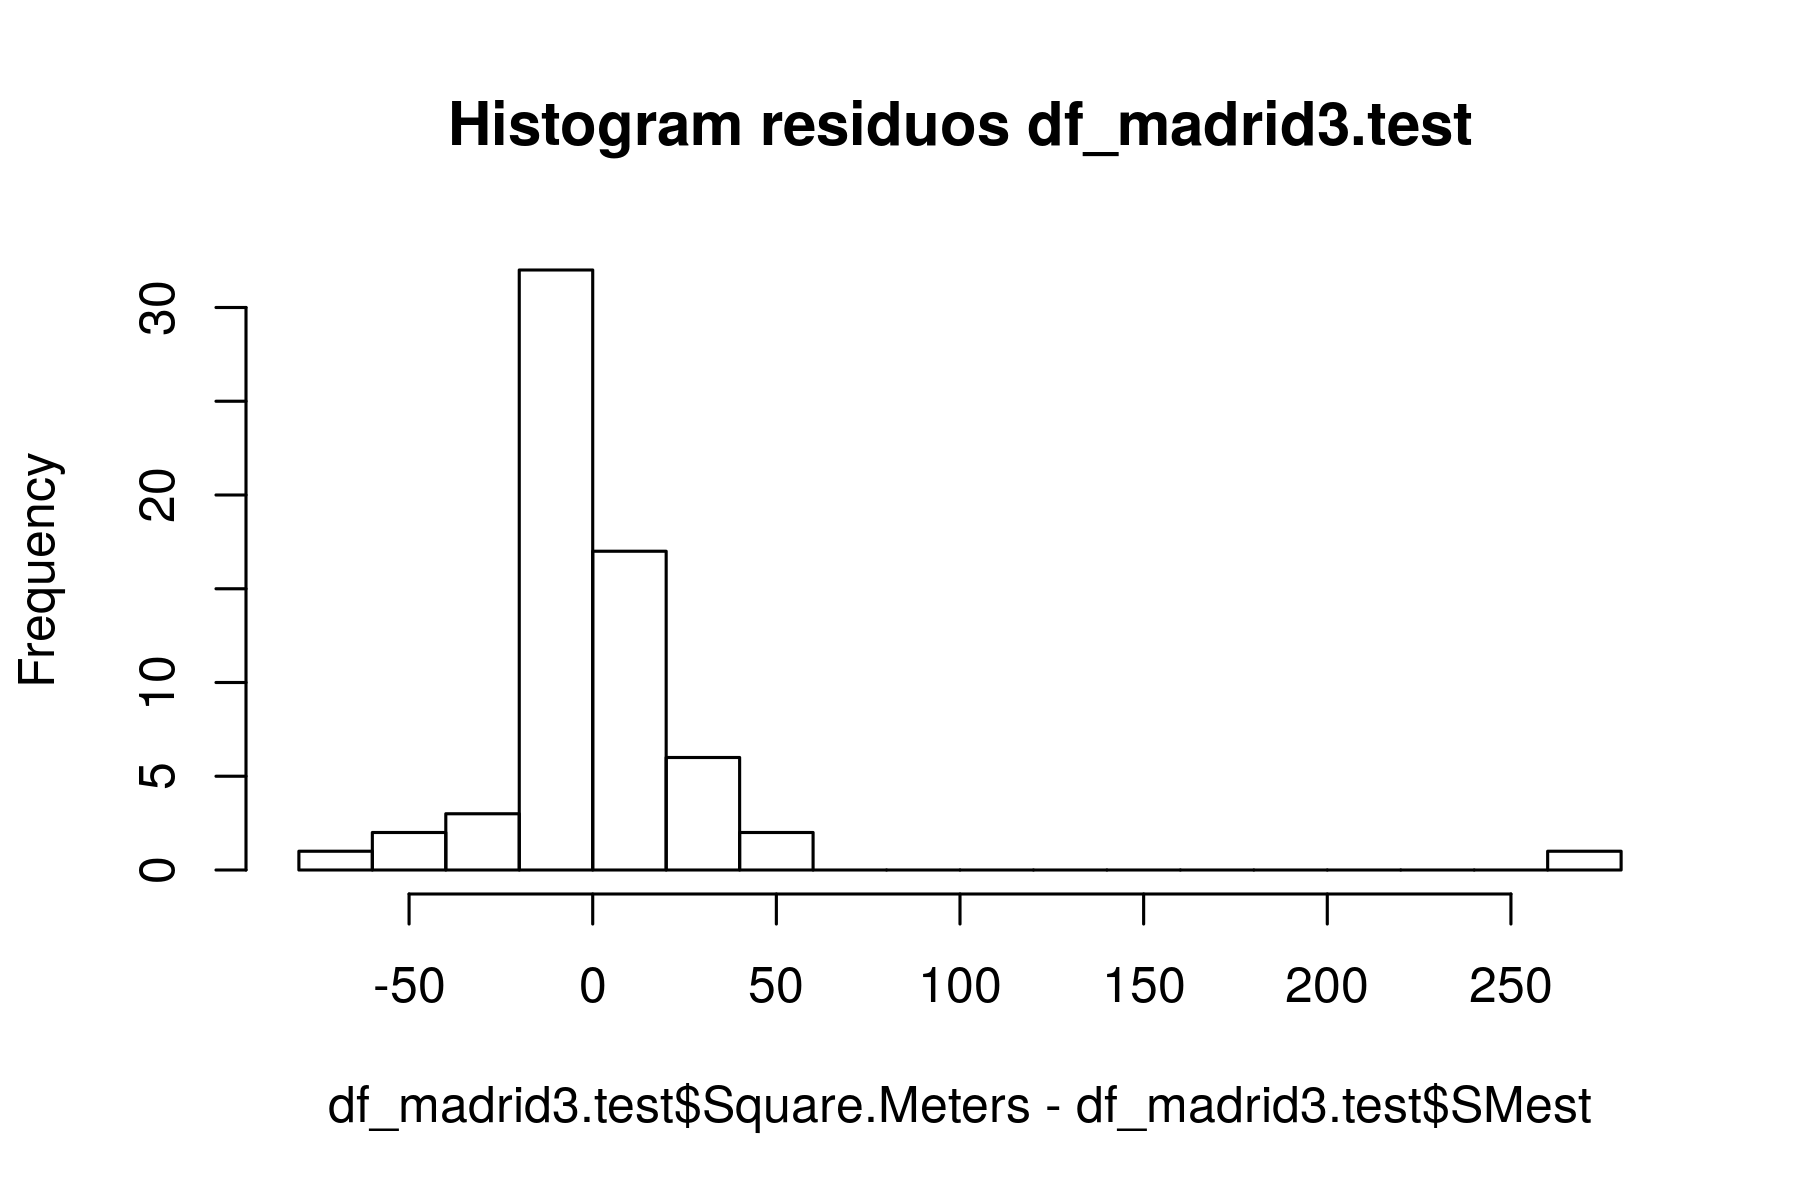

In [19]:
plot(df_madrid3.test$Square.Meters ,(df_madrid3.test$Square.Meters-df_madrid3.test$SMest),  xlim = c(20, 200), ylim = c(-40, 90))
hist(df_madrid3.test$Square.Meters-df_madrid3.test$SMest , breaks= 22, main="Histogram residuos df_madrid3.test")


In [20]:
# El ECM tiene que ser calculado sobre el conjunto de test, ya que es el modelo que voy a usar cuando vengan nuevas muestras
ECM = sum((df_madrid3.test$Square.Meters-df_madrid3.test$SMest )^2,na.rm = T)/length(df_madrid3.test$Square.Meter)
ECM

[1] 58.95992

In [21]:
paste("Comparando los histogramas y el plot de residuos del grupo de train y test, la forma es similar, por lo que nos indica que el modelo tiene sentido.  ")
paste("La nube de residuos no es exactamente una recta, lo que muestra que hay variabiliad entre los datos, y que el modelo no es perfecto")
paste("El histograma nos indica que hay uns distribucion siguiendo una respuesta gausiana mas o menos, y la variabilidad esta en 58 metros cuadrados, lo que es aceptable")

[1] "Comparando los histogramas y el plot de residuos del grupo de train y test, la forma es similar, por lo que nos indica que el modelo tiene sentido.  "

[1] "La nube de residuos no es exactamente una recta, lo que muestra que hay variabiliad entre los datos, y que el modelo no es perfecto"

[1] "El histograma nos indica que hay uns distribucion siguiendo una respuesta gausiana mas o menos, y la variabilidad esta en 58 metros cuadrados, lo que es aceptable"

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [22]:
cluster_barrio = df_madrid3[which(df_madrid2$Neighbourhood=="Sol")[1],]$neighb_id
paste("El número de cluster para el Barrio = Sol, es: ", cluster_barrio)

columns =  c('Accommodates','Bathrooms','Bedrooms', 'Beds', 'Price', 'Guests.Included','Extra.People','Review.Scores.Rating', 'Latitude', 'Longitude','Square.Meters','neighb_id')
no_bedrooms = 3
values = c(6, 2, no_bedrooms, 6, 80, 2, 25, 90, 40, 39,  NA, cluster_barrio) 
df_anuncio = df_madrid2[0, 2:ncol(df_madrid2)]
df_anuncio[1,] = values
df_anuncio[2,] =  c(6, 2, 4, 6, 80, 2, 25, 90, 40, 39,  NA, cluster_barrio)
df_anuncio[3,] =  c(6, 2, 5, 6, 80, 2, 25, 90, 40, 39,  NA, cluster_barrio)

df_anuncio$Square.Meters = predict (mod4, df_anuncio)
dif = abs(round(df_anuncio[1,]$Square.Meters, 2)-round(df_anuncio[2,]$Square.Meters, 2))

paste("El número de metros cuadrados para un alquiler en el Barrio=Sol, para 6 personas, y un precio de 80€ es de: ", round(df_anuncio[1,]$Square.Meters, 2))
paste ("Los metros cuadrados por habitación varían en: " , dif) 

[1] "El número de cluster para el Barrio = Sol, es:  4"

[1] "El número de metros cuadrados para un alquiler en el Barrio=Sol, para 6 personas, y un precio de 80€ es de:  98.59"

[1] "Los metros cuadrados por habitación varían en:  15.92"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [23]:
df_madrid3$Square.Meters =  predict (mod4, df_madrid3)
head(df_madrid3)
#df_madrid3[which(is.na(df_madrid3$Square.Meters)), ]

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,2,1,1,1,65,1,0,100,40.40233,-3.705738,51.18596,1
2,4,1,2,2,45,2,25,89,40.40068,-3.704121,64.39156,1
3,4,1,1,2,59,2,10,95,40.39933,-3.701477,50.37290,1
4,4,1,2,3,60,1,0,92,40.40604,-3.710295,66.42421,1
5,3,1,1,2,45,2,10,100,40.40404,-3.703835,48.47577,1
6,2,2,1,1,68,1,0,NA,40.40176,-3.700929,65.13569,1


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [24]:
library(dplyr)
df_madrid_pca = select(df_madrid3, Accommodates,Bathrooms,Bedrooms, Beds, Price, Guests.Included,Extra.People,Review.Scores.Rating, Latitude, Longitude,Square.Meters)
df_madrid_pca = na.omit(df_madrid_pca)

#colSums(is.na(df_madrid_pca))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [25]:
#Estandarizar datos y con prcomp podemos ver como se relacionan las variables entre si.
prmadrid = prcomp(df_madrid_pca,center = TRUE, scale = TRUE)
#prmadrid

[1] "La suma de las varianza de los 6 primeras componentes, es:  88.4"

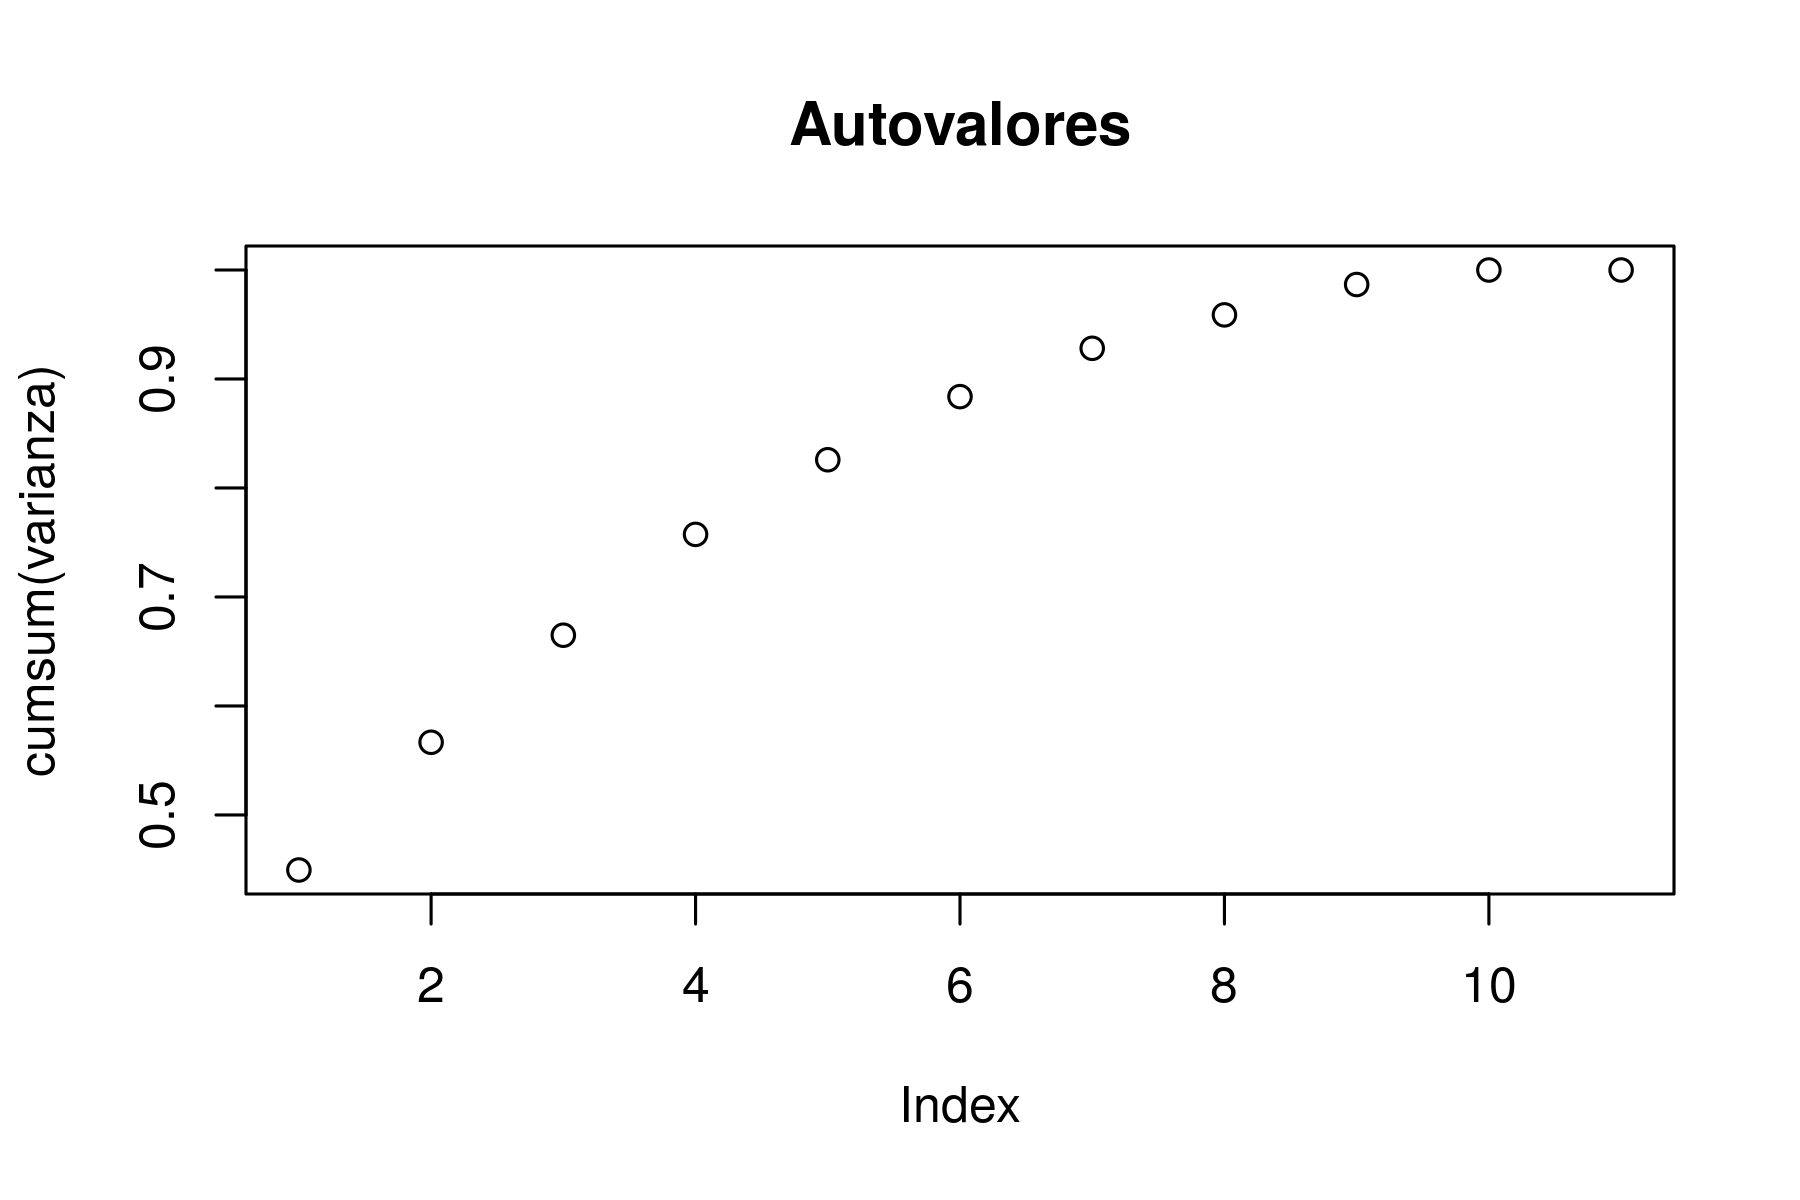

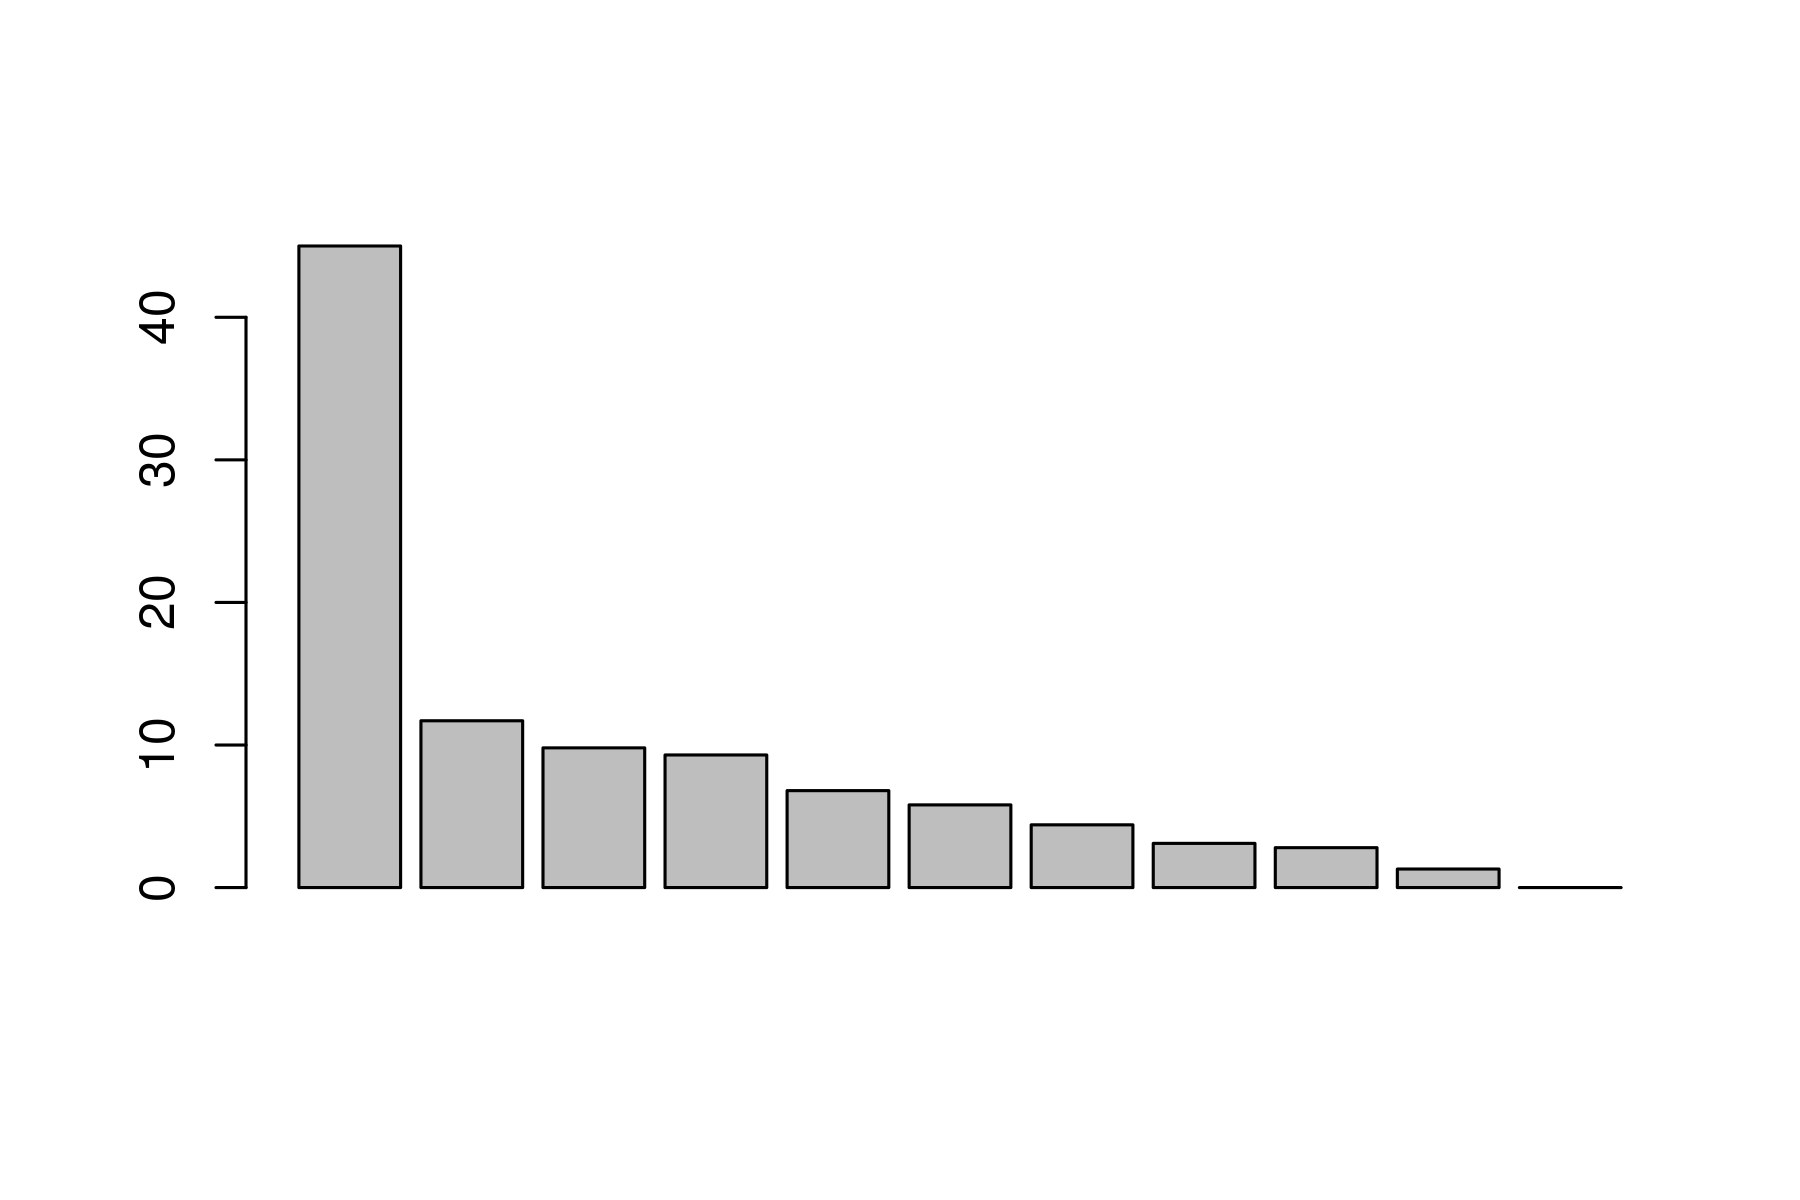

In [26]:
#head(prmadrid$x)
#plot(prmadrid$x[,1], prmadrid$x[,2] )
varianza = prmadrid$sdev^2/sum(prmadrid$sdev^2)
plot(cumsum(varianza),main="Autovalores")
n = 6
paste("La suma de las varianza de los", n, "primeras componentes, es: " ,round(sum(varianza[1:n]*100), 1))
pca_var = round(varianza*100, 1)
barplot (pca_var)
# Escojo los primeros 6 autovalores para llegar a una varianza de 90%

In [27]:
# Función que pasando un nuevo elemento new_vector, un dataframe, para crear el modelo y n número de 
# elementos, muestra los n elementos mas cercanos al new_vector dado. 
topn = function(df ,new_vector, n){
    
    new_vector
    
    prmadrid = prcomp(df,center = TRUE, scale = TRUE)


    # Transformacion del nuevo valor Apartamento a PCs
    new_vector_pca = predict (prmadrid, newdata=new_vector)

    # Para realizar la diferencia, creo un data frame en el que todas las filas, es la misma y asi le resto el 
    # dataframe con todos los apartamentos
    # Del análisis anterior, hemos visto que solo los primeros PCs eran necesarios, por lo que calculo la distancia 
    # contando sólo con estas 6 columnas
    rep_new_vector_pca = new_vector_pca[rep(1, times = nrow(prmadrid$x)), ]
    dist = rowSums((rep_new_vector_pca[, 1:6] - prmadrid$x[, 1:6] )^2)
    idx = sort(unique(dist))[1:(n+1)]


    # Busco los n elementos mas cercanos al dado
    df_result =  new_vector
    df_result = df_result[FALSE,]
    for (i in 2:(n+1)){
        new_row = df[which(dist == idx[i]), ]
        df_result = rbind(df_result, new_row)
    }
    
    return(df_result)
}

v = df_madrid_pca[2000,]
paste ("Datos del apartamento nuevo:")
v
paste ("Datos del los apartamentos mas cercanos al dado:")
topn(df_madrid_pca , v , 5)



[1] "Datos del apartamento nuevo:"

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2423,2,1,1,1,120,1,0,94,40.42702,-3.699952,58.63899


[1] "Datos del los apartamentos mas cercanos al dado:"

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
3420,2,1.5,1,1,68,1,0,95,40.42452,-3.704205,58.36409
4069,2,1.0,1,1,95,1,0,94,40.42534,-3.705242,55.25125
2551,2,1.0,1,1,95,1,0,93,40.42482,-3.696047,55.25125
5485,3,1.0,1,1,120,1,0,94,40.43186,-3.704339,58.63899
3638,2,1.0,1,1,90,1,0,93,40.42384,-3.702201,54.57370


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

Standard deviations (1, .., p=11):
 [1] 2.223633e+00 1.135391e+00 1.039428e+00 1.008791e+00 8.678669e-01
 [6] 7.981555e-01 6.983476e-01 5.808667e-01 5.535930e-01 3.827127e-01
[11] 1.109711e-14

Rotation (n x k) = (11 x 11):
                            PC1         PC2          PC3         PC4
Accommodates         0.39769299  0.07811282 -0.006600503  0.14838147
Bathrooms            0.35801547 -0.10146222  0.158771246 -0.14433057
Bedrooms             0.39681095 -0.03294449  0.119932355  0.01976270
Beds                 0.38293168  0.02179353  0.042216783  0.10284017
Price                0.34835795 -0.05242189  0.137423112 -0.16682710
Guests.Included      0.28783460  0.17762624 -0.390688071  0.17769815
Extra.People         0.12964410  0.23804924 -0.767769884  0.13625484
Review.Scores.Rating 0.03466077  0.13419077 -0.229614838 -0.92234437
Latitude             0.02074168 -0.67420193 -0.203455007  0.05992476
Longitude            0.02746088 -0.64396101 -0.282862186 -0.09163101
Square.Meters    

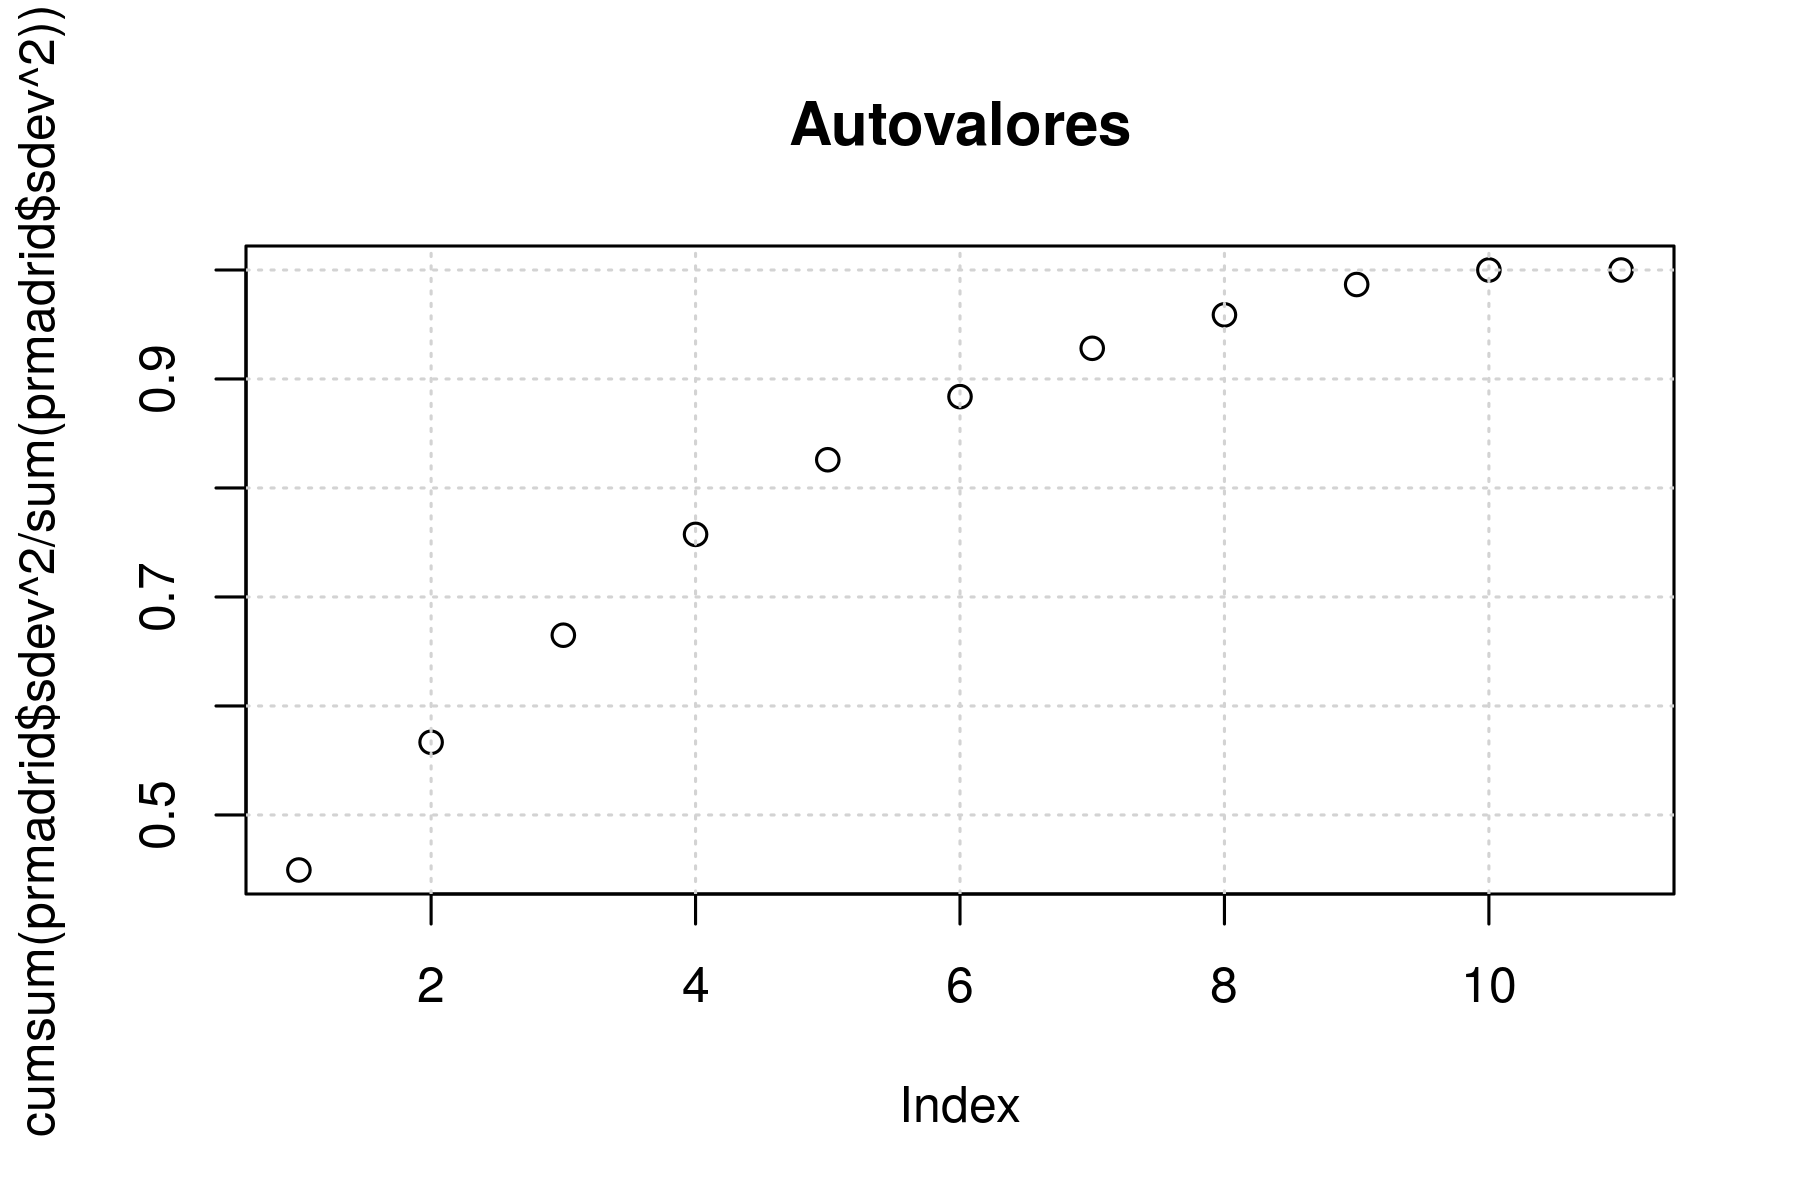

In [28]:
plot(cumsum(prmadrid$sdev^2/sum(prmadrid$sdev^2)),main="Autovalores")
grid()
prmadrid
# Para obtener una varianza de un 90%, es necesario contar con los primeros 5-6 autovalores

In [29]:
library(MASS)
# Usamos LDA porque nos sirve para predecir la probabilidad de que un elemento pertenezca a una clase/cluster.
# Los cluster son los que hemos definido con la variable neigh_id



df_madrid4 = na.omit(df_madrid3)
df_prmadrid_x = cbind ( as.data.frame(prmadrid$x), neighb_id = df_madrid4$neighb_id)
#head(df_prmadrid_x)

mod_lda1<-lda(neighb_id ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10  ,data=df_prmadrid_x)
mod_lda1


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
lda(neighb_id ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + 
    PC9 + PC10, data = df_prmadrid_x)

Prior probabilities of groups:
         1          2          3          4          5          6          7 
0.09018121 0.12579014 0.15865992 0.28381795 0.16055626 0.02191319 0.02212389 
         8 
0.13695744 

Group means:
          PC1        PC2         PC3          PC4        PC5         PC6
1  0.07882061 -0.3414804  0.09976350  0.067802529  0.2241182  0.07467784
2  0.10606390  0.5828985  0.20308001  0.089889140 -0.1763207 -0.03025934
3 -0.23133347 -0.1738763 -0.12802048 -0.038990276 -0.2609660 -0.01938399
4  0.19880144  0.1238225  0.02221879  0.040895230  0.1363731  0.04474872
5 -0.27866231 -0.2680742 -0.08023451  0.009649223  0.2466459  0.08755356
6  0.13447819 -1.4277448 -0.60204560 -0.271198713 -2.3874348 -0.38511678
7 -0.09686672  0.2554787  0.07567525 -0.083874464 -0.3679746 -0.09913489
8  0.02750638  0.1357477  0.02821340 -0.121154953  0.1863694 -0.11666490
        

In [30]:
# De este análisis vemos que las componentes LD1 y LD2(los dos nuevos ejes) son las que tienen mas peso. 
# LDA intenta maximizar la separación entre categorias conocidas. Es también un método para reducir dimensiones. 
# Dentro de los coefficientes LD1 y LD2, son PC2 y PC5 las que tienen mas peso para describir estos coeficientes
# Si nos vamos a la matriz de rotación del resultado de aplicar PCA al dataframe original vemos que
# en las componentes PC2 y PC5, los parámetros LATITUD Y lONGITUD son los que mas peso tienen.
# Por tanto, concluimos que los PCs que mejor pueden describir los clusters por neigh_id, son PC2 y PC5, que están
# dentro de los 6 x PCs que representan el 90% de la varianza en el dataframe.